## IMPORTING LIBRARIES

In [2]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import itertools as ite

In [4]:

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


# Credit EDA Case Study

## Reading the data


Read the `application_data.csv` and `application_data.csv`data file provided and storing it into dataframe `Appln` and `PrevAppln`

In [5]:
#import file

Appln= pd.read_csv(r'C:\Users\sony\Desktop\UPGRAD class\DATA TOOLKIT\Real life case study\application_data.csv')

PrevAppln=pd.read_csv(r'C:\Users\sony\Desktop\UPGRAD class\DATA TOOLKIT\Real life case study\previous_application.csv')

In [6]:
#printing some rows of the dataframe

Appln.head()


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
#printing some rows of the dataframe

PrevAppln.head()


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

## Inspecting the dataframe

dimentions,null values, and summary of different numeric columns

In [8]:
# Checking the shape of the dataframe

print(Appln.shape)

print(PrevAppln.shape)

(307511, 122)
(1670214, 37)


In [9]:
# Checking the column-wise information of the dataframe

Appln.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
PrevAppln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

### Missing/Null Values

In [11]:
#null values in Application dataframe

Appln.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [12]:
#percentage of nul value in Appln dataframe 

Appln.isnull().sum()*100/ Appln.shape[0]

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [13]:
#null values in PrevAppln dataframe

PrevAppln.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [14]:
#percentage of null value in PrevAppln dataframe 

PrevAppln.isnull().sum()*100/ PrevAppln.shape[0]

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

##### Graphical representation of null values in PrevAppln & Appln dataframe

Text(0.5, 0, 'COLUMNS')

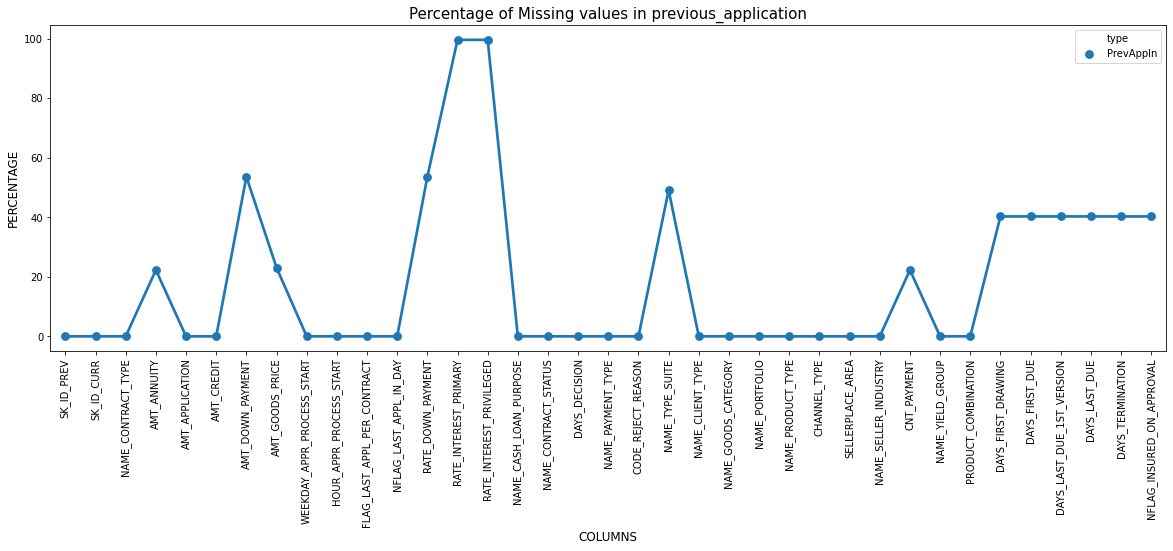

In [15]:
#null values percentage in PrevAppln 

plt.figure(figsize=(20,6))
null_in_PrevAppln = pd.DataFrame((PrevAppln.isnull().sum())*100/PrevAppln.shape[0]).reset_index()
null_in_PrevAppln["type"] = "PrevAppln"
plot1_null = sns.pointplot("index",0,data=null_in_PrevAppln,hue="type")
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values in previous_application",fontsize =15)
plt.ylabel("PERCENTAGE",fontsize =12)
plt.xlabel("COLUMNS",fontsize =12)

Text(0.5, 0, 'COLUMNS')

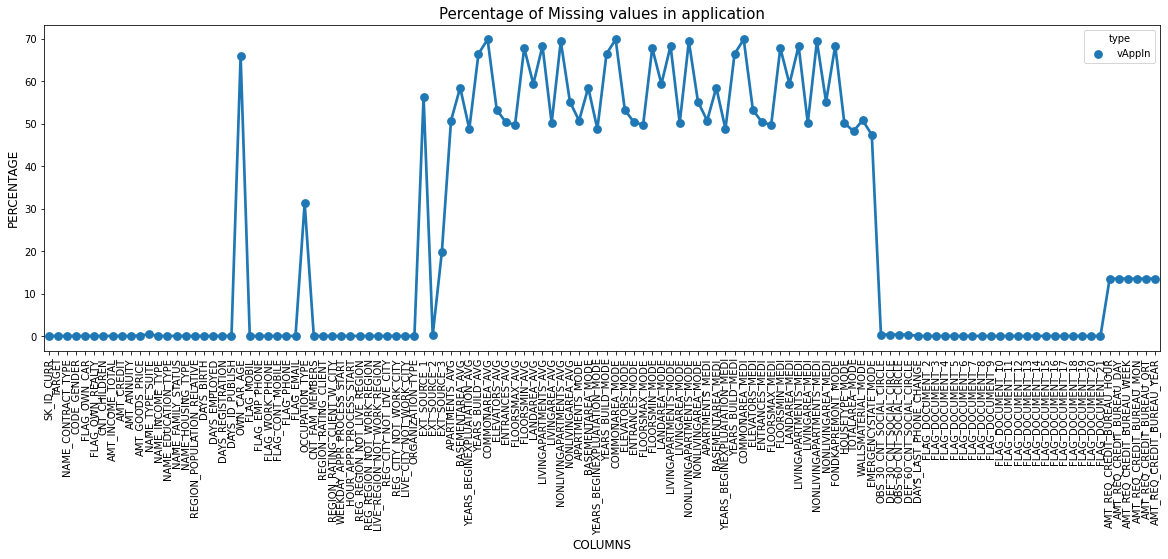

In [16]:
#null values percentage in Appln 

plt.figure(figsize=(20,6))
null_in_Appln = pd.DataFrame((Appln.isnull().sum())*100/Appln.shape[0]).reset_index()
null_in_Appln["type"] = "vAppln"
plot2_null = sns.pointplot("index",0,data=null_in_Appln,hue="type")
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values in application",fontsize =15)
plt.ylabel("PERCENTAGE",fontsize =12)
plt.xlabel("COLUMNS",fontsize =12)

### Handling mising values from PrevAppln dataframe

#### Removing columns with missing values more than 50%

As per Industrial Standard we can remove the colunm which holds more than 40% to 50% missing values

In [17]:
#droping the colunm from the dataframe which holds more than 50% missing values and store it in Previous_Application


Previous_Application=PrevAppln.drop([ 'AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED'],axis=1)


In [18]:
Previous_Application.shape

(1670214, 33)

In [19]:
#The round() function returns a floating point number that is a rounded version of the 
#specified number, with the specified number of decimals.


round(100*(Previous_Application.isnull().sum()/len(Previous_Application.index)),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
NAME_SELLER_INDUSTRY            0.00
CNT_PAYMENT                    22.29
NAME_YIELD_GROUP                0.00
PRODUCT_COMBINATION             0.02
D

Text(0.5, 0, 'COLUMNS')

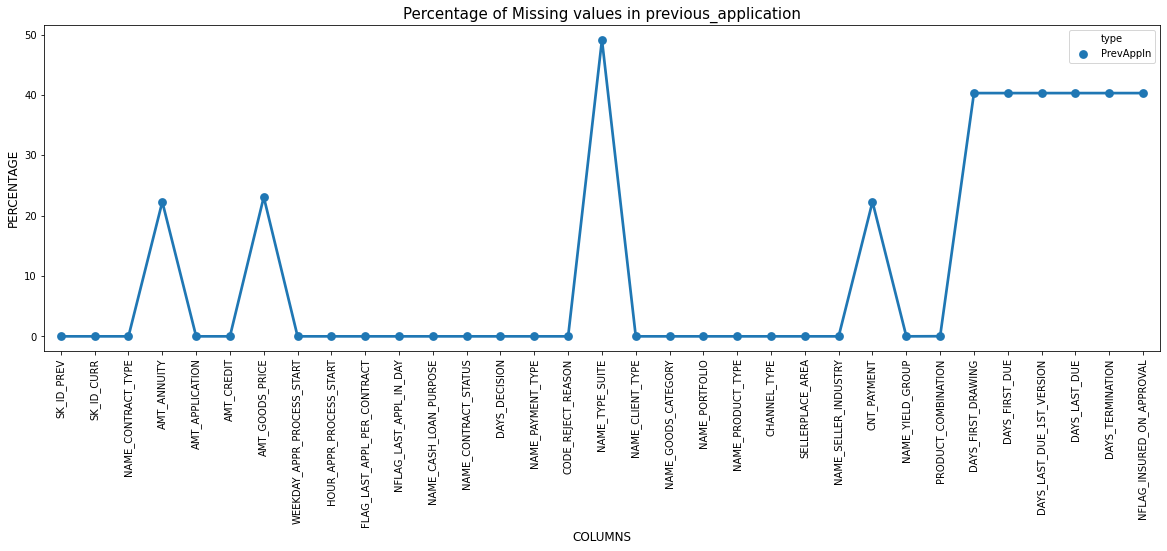

In [20]:
#Graphical percentage of null value afer dropping column more than 50% null values

plt.figure(figsize=(20,6))
null_in_Previous_Application = pd.DataFrame((Previous_Application.isnull().sum())*100/Previous_Application.shape[0]).reset_index()
null_in_Previous_Application["type"] = "PrevAppln"
plot1_null = sns.pointplot("index",0,data=null_in_Previous_Application,hue="type")
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values in previous_application",fontsize =15)
plt.ylabel("PERCENTAGE",fontsize =12)
plt.xlabel("COLUMNS",fontsize =12)

*handling remaining column with null values in Prvious_Application

 *it is not necessary to replace the missing value in this assignment, but if i have to what is my approach is given bellow the tab

In [21]:
Previous_Application['AMT_ANNUITY'].isnull().sum()

372235

In [22]:
Previous_Application['AMT_ANNUITY'].describe()

count    1.297979e+06
mean     1.595512e+04
std      1.478214e+04
min      0.000000e+00
25%      6.321780e+03
50%      1.125000e+04
75%      2.065842e+04
max      4.180581e+05
Name: AMT_ANNUITY, dtype: float64

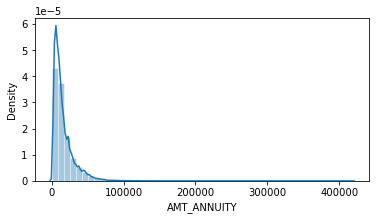

In [23]:

plt.figure(figsize=[6,3])
sns.distplot(Previous_Application['AMT_ANNUITY'], hist_kws=dict(edgecolor="White")) 
plt.show()

APPROCH

We can Fill missing values with 15955 i.e. Mean for 'AMT_ANNUITY'

In [24]:
Previous_Application['AMT_GOODS_PRICE'].isnull().sum()

385515

In [25]:
Previous_Application['AMT_GOODS_PRICE'].describe()

count    1.284699e+06
mean     2.278473e+05
std      3.153966e+05
min      0.000000e+00
25%      5.084100e+04
50%      1.123200e+05
75%      2.340000e+05
max      6.905160e+06
Name: AMT_GOODS_PRICE, dtype: float64

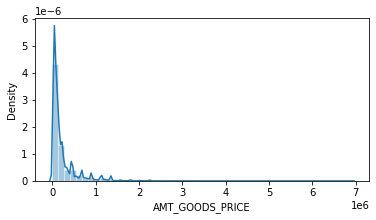

In [26]:
plt.figure(figsize=[6,3])
sns.distplot(Previous_Application['AMT_GOODS_PRICE'], hist_kws=dict(edgecolor="White")) 
plt.show()

APPROCH

We can Fill missing values with 112320 i.e. Median for 'AMT_GOODS_PRICE'

In [27]:
Previous_Application['NAME_TYPE_SUITE'].isnull().sum()

820405

In [28]:
Previous_Application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

APPROCH

We can Fill missing values with 'Unaccompanied' i.e. Mode for 'NAME_TYPE_SUITE'

In [29]:
Previous_Application['CNT_PAYMENT'].isnull().sum()

372230

In [30]:
Previous_Application['CNT_PAYMENT'].describe()

count    1.297984e+06
mean     1.605408e+01
std      1.456729e+01
min      0.000000e+00
25%      6.000000e+00
50%      1.200000e+01
75%      2.400000e+01
max      8.400000e+01
Name: CNT_PAYMENT, dtype: float64

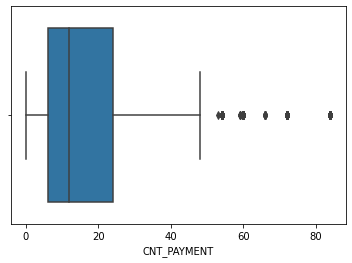

In [31]:
sns.boxplot(Previous_Application['CNT_PAYMENT'])
plt.show()

APPROCH

We can Fill missing values with 12 i.e. Median for 'CNT_PAYMENT'

In [32]:
Previous_Application['DAYS_FIRST_DRAWING'].isnull().sum()


673065

In [33]:
Previous_Application['DAYS_FIRST_DRAWING'].describe()

count    997149.000000
mean     342209.855039
std       88916.115834
min       -2922.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

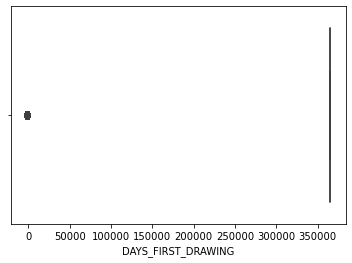

In [34]:
sns.boxplot(Previous_Application['DAYS_FIRST_DRAWING'])
plt.show()

APPROCH

We can Fill missing values with 365243 i.e. Median for 'DAYS_FIRST_DRAWING'

In [35]:
Previous_Application['DAYS_FIRST_DUE'].isnull().sum()

673065

In [36]:
Previous_Application['DAYS_FIRST_DUE'].describe()

count    997149.000000
mean      13826.269337
std       72444.869708
min       -2892.000000
25%       -1628.000000
50%        -831.000000
75%        -411.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

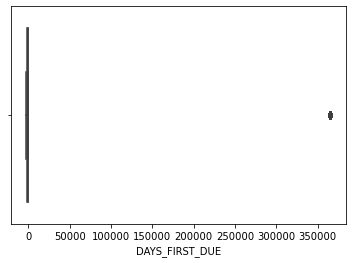

In [37]:
sns.boxplot(Previous_Application['DAYS_FIRST_DUE'])
plt.show()

AppROCH

We can Fill missing values with -831 i.e. Median for 'DAYS_FIRST_DUE'

In [38]:
Previous_Application['DAYS_LAST_DUE_1ST_VERSION'].isnull().sum()


673065

In [39]:
Previous_Application['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    997149.000000
mean      33767.774054
std      106857.034789
min       -2801.000000
25%       -1242.000000
50%        -361.000000
75%         129.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

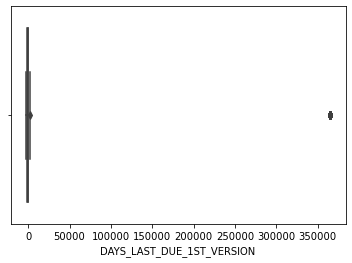

In [40]:
sns.boxplot(Previous_Application['DAYS_LAST_DUE_1ST_VERSION'])
plt.show()

APPROACH

We can Fill missing values with -361 i.e. Median for 'DAYS_LAST_DUE_1ST_VERSION'

In [41]:
Previous_Application['DAYS_LAST_DUE'].isnull().sum()

673065

In [42]:
Previous_Application['DAYS_LAST_DUE'].describe()

count    997149.000000
mean      76582.403064
std      149647.415123
min       -2889.000000
25%       -1314.000000
50%        -537.000000
75%         -74.000000
max      365243.000000
Name: DAYS_LAST_DUE, dtype: float64

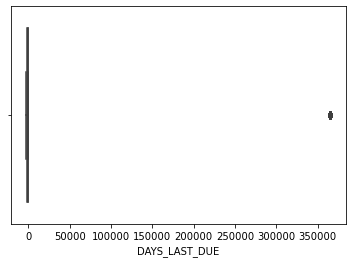

In [43]:
sns.boxplot(Previous_Application['DAYS_LAST_DUE']) 
plt.show()

APPROACH

We can Fill missing values with -537 i.e. Median for 'DAYS_LAST_DUE'

In [44]:
Previous_Application['DAYS_TERMINATION'].isnull().sum()

673065

In [45]:
Previous_Application['DAYS_TERMINATION'].describe()

count    997149.000000
mean      81992.343838
std      153303.516729
min       -2874.000000
25%       -1270.000000
50%        -499.000000
75%         -44.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

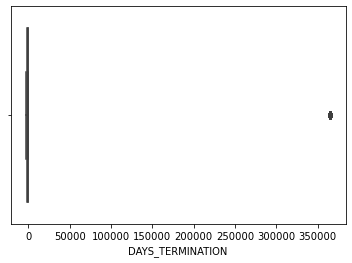

In [46]:
sns.boxplot(Previous_Application['DAYS_TERMINATION'])
plt.show()

APPROACH

We can Fill missing values with -499 i.e. Median for 'DAYS_TERMINATION'

In [47]:
Previous_Application['NFLAG_INSURED_ON_APPROVAL'].isnull().sum()

673065

In [48]:
Previous_Application['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    665527
1.0    331622
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

APPROACH

We can Fill missing values with 0 i.e. Mode for 'NFLAG_INSURED_ON_APPROVAL'

In [49]:
Previous_Application.isnull().sum()

SK_ID_PREV                          0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_ANNUITY                    372235
AMT_APPLICATION                     0
AMT_CREDIT                          1
AMT_GOODS_PRICE                385515
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
NAME_CASH_LOAN_PURPOSE              0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
CODE_REJECT_REASON                  0
NAME_TYPE_SUITE                820405
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT_TYPE                   0
CHANNEL_TYPE                        0
SELLERPLACE_AREA                    0
NAME_SELLER_INDUSTRY                0
CNT_PAYMENT                    372230
NAME_YIELD_GROUP                    0
PRODUCT_COMB

In [50]:
Previous_Application['AMT_CREDIT'].isnull().sum()

1

In [51]:
Previous_Application['AMT_CREDIT'].describe()

count    1.670213e+06
mean     1.961140e+05
std      3.185746e+05
min      0.000000e+00
25%      2.416050e+04
50%      8.054100e+04
75%      2.164185e+05
max      6.905160e+06
Name: AMT_CREDIT, dtype: float64

<AxesSubplot:xlabel='AMT_CREDIT'>

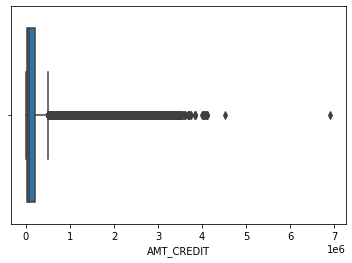

In [52]:
sns.boxplot(Previous_Application['AMT_CREDIT'])

APPROACH

We can Fill missing values with 80541 i.e. Median for 'AMT_CREDIT'

In [53]:
Previous_Application['PRODUCT_COMBINATION'].isnull().sum()

346

In [54]:
Previous_Application['PRODUCT_COMBINATION'].value_counts()

Cash                              285990
POS household with interest       263622
POS mobile with interest          220670
Cash X-Sell: middle               143883
Cash X-Sell: low                  130248
Card Street                       112582
POS industry with interest         98833
POS household without interest     82908
Card X-Sell                        80582
Cash Street: high                  59639
Cash X-Sell: high                  59301
Cash Street: middle                34658
Cash Street: low                   33834
POS mobile without interest        24082
POS other with interest            23879
POS industry without interest      12602
POS others without interest         2555
Name: PRODUCT_COMBINATION, dtype: int64

APPROACH

We can Fill missing values with Cash i.e. Mode for 'PRODUCT_COMBINATION'

### Handling mising values from Appln dataframe

In [55]:
#percentage of nul value in Appln dataframe 

Appln.isnull().sum()*100/ Appln.shape[0]

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

Text(0.5, 0, 'COLUMNS')

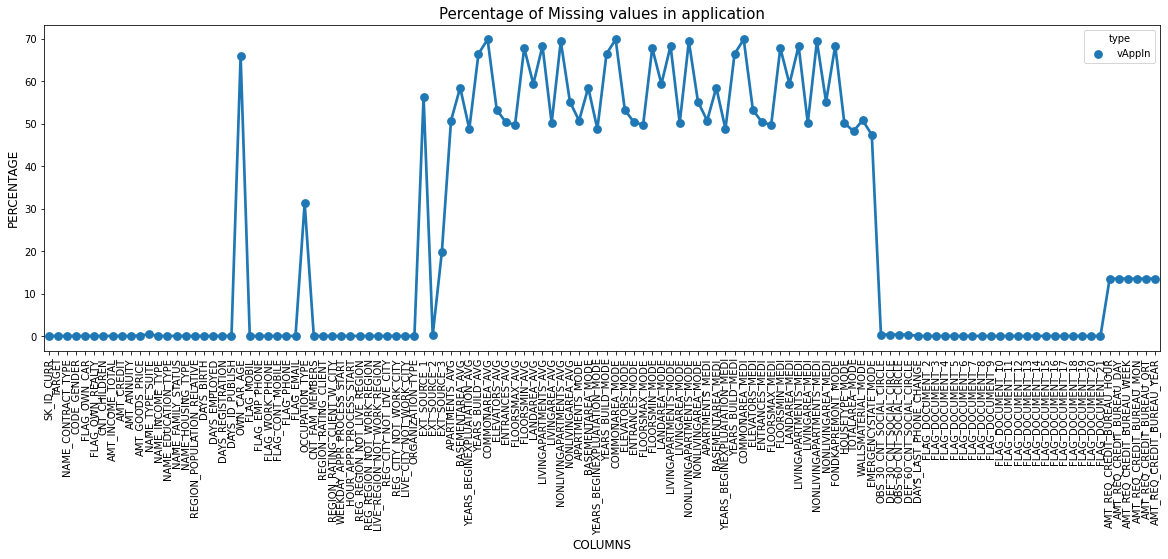

In [56]:
#null values percentage in Appln 

plt.figure(figsize=(20,6))
null_in_Appln = pd.DataFrame((Appln.isnull().sum())*100/Appln.shape[0]).reset_index()
null_in_Appln["type"] = "vAppln"
plot2_null = sns.pointplot("index",0,data=null_in_Appln,hue="type")
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values in application",fontsize =15)
plt.ylabel("PERCENTAGE",fontsize =12)
plt.xlabel("COLUMNS",fontsize =12)

#### Removing columns with missing values more than 40%
As per Industrial Standard we can drop the column which holds more than 40% to 50 % missing values depending upon the data acquired in specific sector.

Appln dataframe have lots of colunm which holds more than 40% null values shows in above pointplot percentage of Appln dataframe so we going to drop that columns

In [57]:
Application=Appln.drop([ 'EXT_SOURCE_1',
       'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG',
       'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG',
       'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG',
       'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG',
       'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
       'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE',
       'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI',
       'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI',
       'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI',
       'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI',
       'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE',"OWN_CAR_AGE"],axis=1)

In [58]:
Application.shape

(307511, 73)

In [59]:
Application.isnull().sum()*100/ Application.shape[0]

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

Text(0.5, 0, 'COLUMNS')

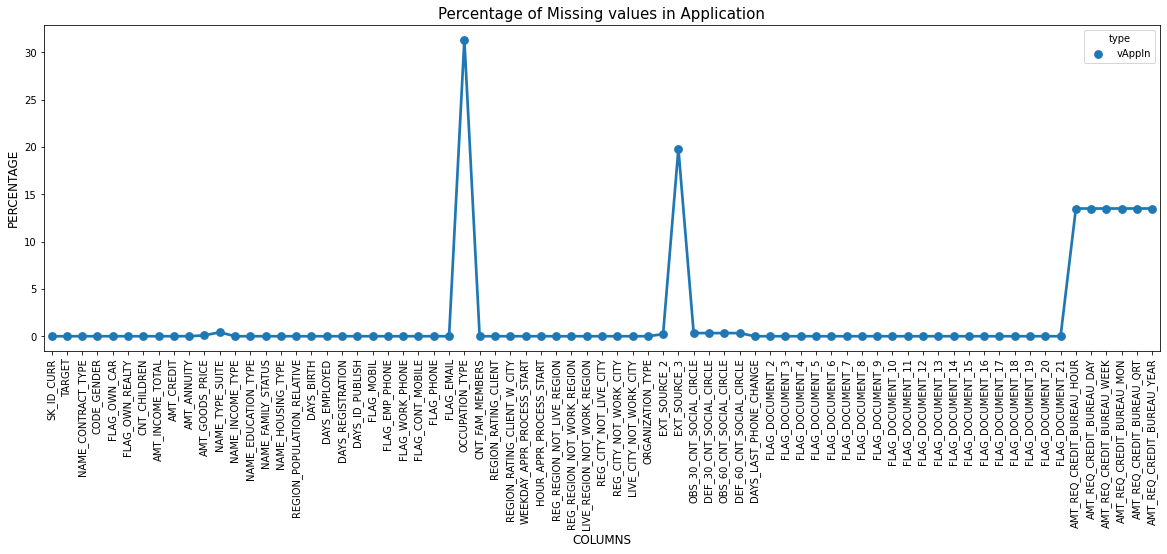

In [60]:
#remaning null values percentage in Applicatin after dropping above 40% null value columns

plt.figure(figsize=(20,6))
null_in_Application = pd.DataFrame((Application.isnull().sum())*100/Application.shape[0]).reset_index()
null_in_Application["type"] = "vAppln"
plot2_null = sns.pointplot("index",0,data=null_in_Application,hue="type")
plt.xticks(rotation =90,fontsize =10)
plt.title("Percentage of Missing values in Application",fontsize =15)
plt.ylabel("PERCENTAGE",fontsize =12)
plt.xlabel("COLUMNS",fontsize =12)

In [61]:
round((Application.isnull().sum()*100/ Application.shape[0]),2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
FLAG_MOBIL                      0.00
FLAG_EMP_PHONE                  0.00
FLAG_WORK_PHONE                 0.00
FLAG_CONT_MOBILE                0.00
FLAG_PHONE                      0.00
FLAG_EMAIL                      0.00
O

In [62]:
Application['OCCUPATION_TYPE'].isnull().sum()

96391

In [63]:
Application['OCCUPATION_TYPE'].value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

APPROACH

We can Fill missing values with Laborers i.e Mode for 'OCCUPATION_TYPE'

In [64]:
Application['EXT_SOURCE_2'].isnull().sum()

660

In [65]:
Application['EXT_SOURCE_2'].describe()

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [66]:

plt.figure(figsize=[6,3])
sns.distplot(Application['EXT_SOURCE_2'], hist_kws=dict(edgecolor="White")) 
plt.show()

APPROACH

We can Fill missing values with 56596 i.e median for 'EXT_SOURCE_2'

In [67]:
Application['EXT_SOURCE_3'].isnull().sum()

60965

In [68]:
Application['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

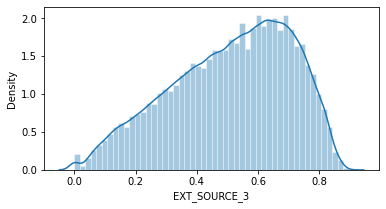

In [69]:
plt.figure(figsize=[6,3])
sns.distplot(Application['EXT_SOURCE_3'], hist_kws=dict(edgecolor="White")) 
plt.show()

APPROACH

We can Fill missing values with 0535276 i.e median for 'EXT_SOURCE_3'

In [70]:
Application['AMT_REQ_CREDIT_BUREAU_DAY'].isnull().sum()

41519

In [71]:
Application['AMT_REQ_CREDIT_BUREAU_DAY'].describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

APPROACH

We can Fill missing values with 0 i.e median for 'AMT_REQ_CREDIT_BUREAU_DAY'

In [72]:
Application['AMT_REQ_CREDIT_BUREAU_HOUR'].isnull().sum()

41519

In [73]:
Application['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

APPROACH

We can Fill missing values with 0 i.e median for 'AMT_REQ_CREDIT_BUREAU_HOUR'

In [74]:
Application['AMT_REQ_CREDIT_BUREAU_MON'].isnull().sum()

41519

In [75]:
Application['AMT_REQ_CREDIT_BUREAU_MON'].describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

APPROACH

We can Fill missing values with 0 i.e median for 'AMT_REQ_CREDIT_BUREAU_MON'

In [76]:
Application['AMT_REQ_CREDIT_BUREAU_QRT'].isnull().sum()

41519

In [77]:
Application['AMT_REQ_CREDIT_BUREAU_QRT'].describe()

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

APPROACH

We can Fill missing values with 0 i.e median for 'AMT_REQ_CREDIT_BUREAU_QRT'

In [78]:
Application['AMT_REQ_CREDIT_BUREAU_WEEK'].isnull().sum()

41519

In [79]:
Application['AMT_REQ_CREDIT_BUREAU_WEEK'].describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

APPROACH

We can Fill missing values with 0 i.e median for 'AMT_REQ_CREDIT_BUREAU_WEEK'

In [80]:
Application['AMT_REQ_CREDIT_BUREAU_YEAR'].isnull().sum()

41519

In [81]:
Application['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

APPROACH

We can Fill missing values with 0 i.e mean for 'AMT_REQ_CREDIT_BUREAU_YEAR'

In [82]:
Application['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [83]:
Application['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

APPROACH

We can Fill missing values with 0 i.e median for 'DEF_30_CNT_SOCIAL_CIRCLE'

In [84]:
Application['DEF_30_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [85]:
Application['DEF_30_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.143421
std           0.446698
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          34.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64

APPROACH

We can Fill missing values with 0 i.e median for 'DEF_30_CNT_SOCIAL_CIRCLE'

In [86]:
Application['OBS_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [87]:
Application['OBS_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          1.405292
std           2.379803
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         344.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64

APPROACH

We can Fill missing values with 0 i.e median for 'OBS_60_CNT_SOCIAL_CIRCLE'

In [88]:
Application['DEF_60_CNT_SOCIAL_CIRCLE'].isnull().sum()

1021

In [89]:
Application['DEF_60_CNT_SOCIAL_CIRCLE'].describe()

count    306490.000000
mean          0.100049
std           0.362291
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          24.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64

APPROACH

We can Fill missing values with 0 i.e median for 'DEF_60_CNT_SOCIAL_CIRCLE'

In [90]:
Application.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
O

In [91]:
Application['AMT_ANNUITY'].isnull().sum()

12

In [92]:
Application['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [93]:
sns.distplot(Application['AMT_ANNUITY'],hist_kws=dict(edgecolor="White"))

plt.show()

APPROACH

it's right skewed graph so We can Fill missing values with 0 i.e. Mean for 'AMT_ANNUITY'

In [94]:
Application['AMT_GOODS_PRICE'].isnull().sum()

278

In [95]:
Application['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

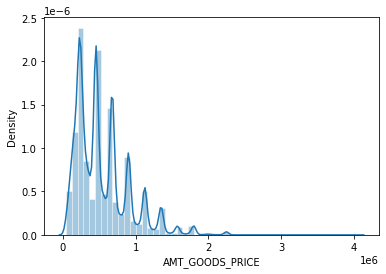

In [96]:
sns.distplot(Application['AMT_GOODS_PRICE'],hist_kws=dict(edgecolor="White")) 

plt.show()

APPROACH

it's right skewed graph so We can Fill missing values with 0 i.e. Mean for 'AMT_GOODS_PRICE'

In [97]:
Application['NAME_TYPE_SUITE'].isnull().sum()

1292

In [98]:
Application['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

APPROACH

We can Fill missing values with 'Unaccompanied ' i.e. Mean for 'NAME_TYPE_SUITE'

In [99]:
Application['CNT_FAM_MEMBERS'].isnull().sum()

2

In [100]:
Application['CNT_FAM_MEMBERS'].describe()

count    307509.000000
mean          2.152665
std           0.910682
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [101]:
#sns.boxplot(Application['CNT_FAM_MEMBERS'])
sns.distplot(Application['CNT_FAM_MEMBERS'],hist_kws=dict(edgecolor="White")) 

plt.show()

APPROACH

We can Fill missing values with 2 i.e. Median for 'CNT_FAM_MEMBERS', Mean is not be used as this field needs to be Whole number

In [102]:
Application['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

1

In [103]:
Application['DAYS_LAST_PHONE_CHANGE'].value_counts()

 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-3558.0        1
-3978.0        1
-3701.0        1
-3809.0        1
-3731.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

APPROACH

We can Fill missing values with  i.e. Mode for 'DAYS_LAST_PHONE_CHANGE'

In [104]:
type(Application.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

NoneType

## Converting negative values to absolute values

there are some column which have some negative values and they should not contain negative values because of the data type of the column like DAY, DATE, TIME ,etc

we converting the -ve value into absolute value using "abs" function

The 'abs()' function returns the absolute value of the specified number.

In [105]:
#converting the -ve value into absolute value

Application['DAYS_BIRTH'] = abs(Application['DAYS_BIRTH'])
Application['DAYS_EMPLOYED'] = abs(Application['DAYS_EMPLOYED'])
Application['DAYS_ID_PUBLISH'] = abs(Application['DAYS_ID_PUBLISH'])
Application['DAYS_REGISTRATION'] = abs(Application['DAYS_REGISTRATION'])
Application['DAYS_LAST_PHONE_CHANGE'] = abs(Application['DAYS_LAST_PHONE_CHANGE'])

In [106]:
Application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.010032       19046            225             4260.0   
3                    0.008019       19005           3039             9833.0   
4                    0.028663       19932           3038             4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2             2531           1               1                1   
3             2437           1               1                0   
4             3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

### data balance/imbalance percentage

In [107]:
plt.figure(figsize=(13,6))
plt.subplot(121)
Application["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["brown","yellow"],startangle = 60,
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

##### point to infer
 data is not balanced

## Distribution of Target variable

Target variable: 1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in sample, 0 - all other cases

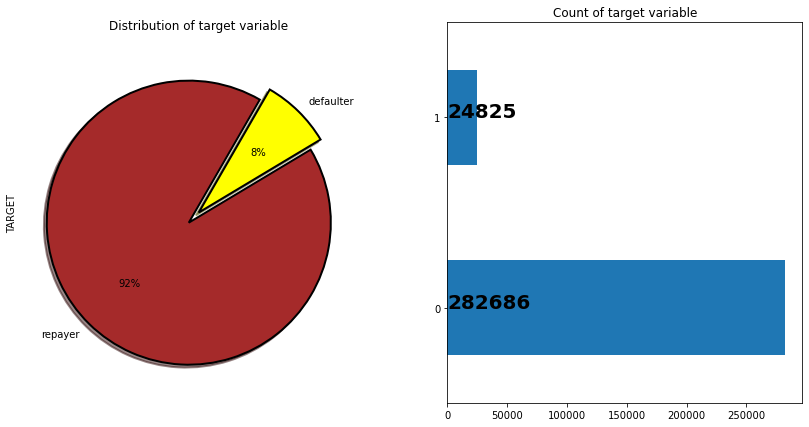

In [108]:
plt.figure(figsize=(14,7))
plt.subplot(121)
Application["TARGET"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["brown","yellow"],startangle = 60,labels=["repayer","defaulter"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of target variable")

plt.subplot(122)
ax = Application["TARGET"].value_counts().plot(kind="barh")

for i,j in enumerate(Application["TARGET"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of target variable")
plt.show()


#### Point to infer

 92% out of total client population repay there loans and 8% out of total client population have difficulties in repaying loans 

### Merging Application and Previous_Application

In [109]:
Application_d1 = Application[[x for x in Application.columns if x not in ["TARGET"]]]
Previous_Application_d1 =Previous_Application[[x for x in Previous_Application.columns if x not in ["TARGET"]]]
Application_d1["type"] = "Application"
Previous_Application_d1["type"] = "Previous_Application"
Data = pd.concat([Application_d1,Previous_Application_d1],axis=0) 

In [110]:
Data.head()

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      100002         Cash loans           M            N               Y   
1      100003         Cash loans           F            N               N   
2      100004    Revolving loans           M            Y               Y   
3      100006         Cash loans           F            N               Y   
4      100007         Cash loans           M            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0           0.0          202500.0    406597.5      24700.5         351000.0   
1           0.0          270000.0   1293502.5      35698.5        1129500.0   
2           0.0           67500.0    135000.0       6750.0         135000.0   
3           0.0          135000.0    312682.5      29686.5         297000.0   
4           0.0          121500.0    513000.0      21865.5         513000.0   

  NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0   Unaccompanied          Working  Secondary / secondary special   
1          Family    State servant               Higher education   
2   Unaccompanied          Working  Secondary / secondary special   
3   Unaccompanied          Working  Secondary / secondary special   
4   Unaccompanied          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  \
0      9461.0          637.0             3648.0           2120.0         1.0   
1     16765.0         1188.0             1186.0            291.0         1.0   
2     19046.0          225.0             4260.0           2531.0         1.0   
3     19005.0         3039.0             9833.0           2437.0         1.0   
4     19932.0         3038.0             4311.0           3458.0         1.0   

   FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  \
0             1.0              0.0               1.0         1.0         0.0   
1             1.0              0.0               1.0         1.0         0.0   
2             1.0              1.0               1.0         1.0         0.0   
3             1.0              0.0               1.0         0.0         0.0   
4             1.0              0.0               1.0         0.0         0.0   

  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0        Laborers              1.0                   2.0   
1      Core staff              2.0                   1.0   
2        Laborers              1.0                   2.0   
3        Laborers              2.0                   2.0   
4      Core staff              1.0                   2.0   

   REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  \
0                          2.0                  WEDNESDAY   
1                          1.0                     MONDAY   
2                          2.0                     MONDAY   
3                          2.0                  WEDNESDAY   
4                          2.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  \
0                       10                         0.0   
1                       11                         0.0   
2                        9                         0.0   
3                       17                         0.0   
4                       11                         0.0   

   REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  \
0                         0.0                          0.0   
1                         0.0             

### Distribution in Contract types in application_data

NAME_CONTRACT_TYPE : Identification if loan is cash , consumer or revolving



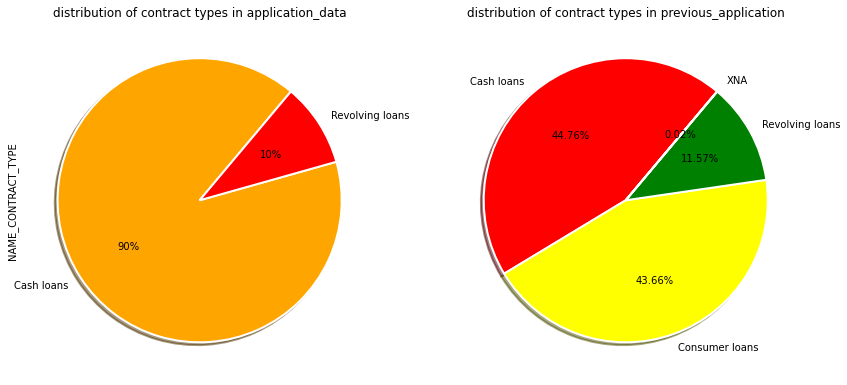

In [111]:
plt.figure(figsize=(14,7))
plt.subplot(121)
Data[Data["type"] == "Application"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orange","red"],startangle = 50,
wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("distribution of contract types in application_data")

plt.subplot(122)
Data[Data["type"] == "Previous_Application"]["NAME_CONTRACT_TYPE"].value_counts().plot.pie(autopct = "%1.2f%%",colors = ["red","yellow","green"],startangle = 50,
wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.ylabel("")
plt.title("distribution of contract types in previous_application")
plt.show()

application_data: 90% loans are cash and 10% loan are revolving loans

previous_application: 44.76% loans are cash loans, 11.57% are revolving and 43.66% are consumer loans

### Gender imbalance in Application

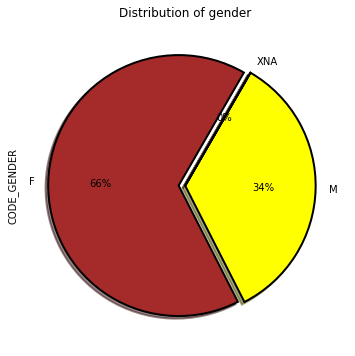

In [112]:
plt.figure(figsize=(13,6))
plt.subplot(121)
Application["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["brown","yellow"],startangle = 60,
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of gender")
plt.show()

#### point to infer
Female:- 66%

Male:- 34%

### Distribution of client owning a car and by gender
FLAG_OWN_CAR Flag if the client owns a car .

In [117]:
plt.figure(figsize=(13,6))
plt.subplot(121)
Data["FLAG_OWN_CAR"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["gold","orangered"],startangle = 60,
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0],shadow =True)
plt.title("distribution of client owning a car")

plt.subplot(122)
Data[Data["FLAG_OWN_CAR"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["b","orangered"],startangle = 90,
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("distribution of client owning a car by gender")

plt.show()

#### Point to infer 
 1 : Distribution of client owning a car. 34% of clients own a car .

 2 : Distribution of client owning a car by gender. Out of total clients who own car 57% are male and 43% are female.

### Distribution of client owning a house or flat and by gender
FLAG_OWN_REALTY - Flag if client owns a house or flat

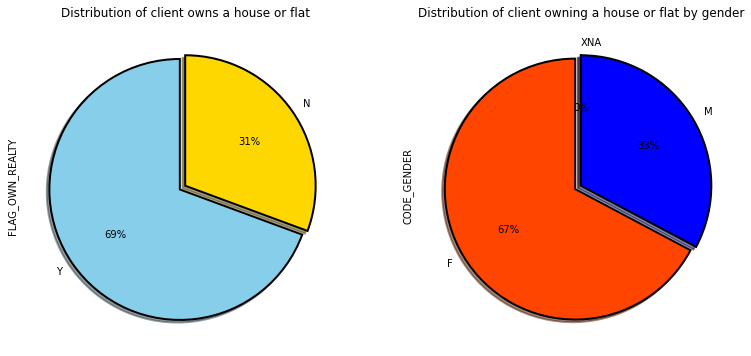

In [118]:
plt.figure(figsize=(13,6))
plt.subplot(121)
Data["FLAG_OWN_REALTY"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["skyblue","gold"],startangle = 90,
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[0.05,0],shadow =True)
plt.title("Distribution of client owns a house or flat")

plt.subplot(122)
Data[Data["FLAG_OWN_REALTY"] == "Y"]["CODE_GENDER"].value_counts().plot.pie(autopct = "%1.0f%%",colors = ["orangered","b"],startangle = 90,
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.05,0,0],shadow =True)
plt.title("Distribution of client owning a house or flat by gender")
plt.show()


#### Point to infer 
 1 : Distribution of client owning a house or flat . 69% of clients own a flat or house .

 2 : Distribution of client owning a house or flat by gender . Out of total clients who own house 67% are female and 33% are male.

### Distribution of Number of children and family members of client by repayment status.
CNT_CHILDREN - Number of children the client has.

CNT_FAM_MEMBERS - How many family members does client have.

Text(0.5, 1.0, ' Distribution of Number of family members client has  by repayment status')

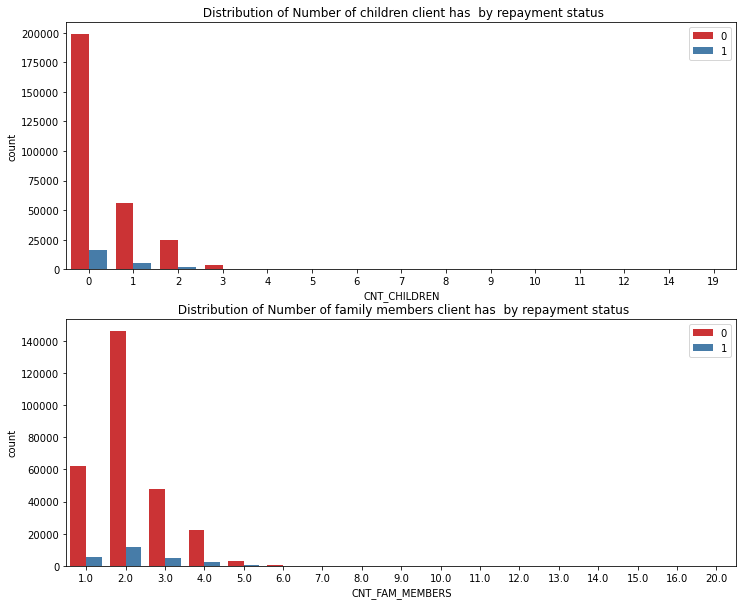

In [119]:
plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(Application["CNT_CHILDREN"],palette="Set1",hue=Application["TARGET"])
plt.legend(loc="upper right")
plt.title(" Distribution of Number of children client has  by repayment status")

plt.subplot(212)
sns.countplot(Application["CNT_FAM_MEMBERS"],palette="Set1",hue=Application["TARGET"])
plt.legend(loc="upper right")
plt.title(" Distribution of Number of family members client has  by repayment status")


### Distribution of contract type ,gender ,own car ,own house with respect to Repayment status(Target variable)

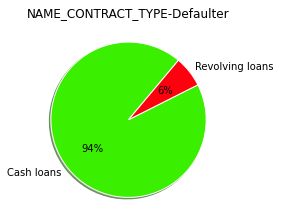

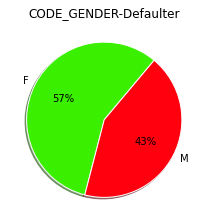

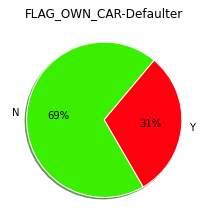

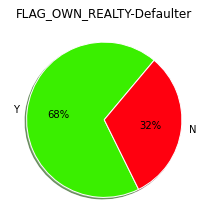

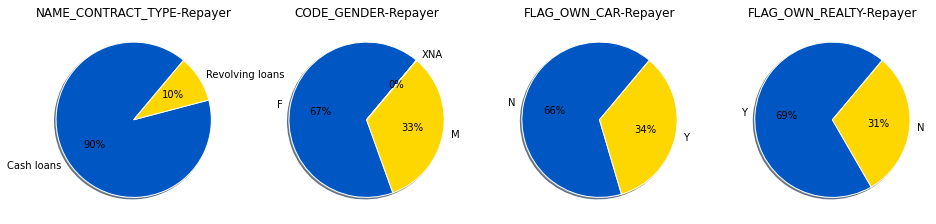

In [120]:

Default = Application[Application["TARGET"]==1][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]
Non_default = Application[Application["TARGET"]==0][[ 'NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']]

d_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER','FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
d_length = len(d_cols)
plt.figure(figsize=(16,4))
for i,j in ite.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    Default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism"),startangle = 50,
    wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    plt.ylabel("")
    plt.title(i+"-Defaulter")

    plt.figure(figsize=(16,4))
for i,j in ite.zip_longest(d_cols,range(d_length)):
    plt.subplot(1,4,j+1)
    Non_default[i].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",3),startangle = 50,
    wedgeprops={"linewidth":1,"edgecolor":"white"},shadow =True)
    plt.ylabel("")
    plt.title(i+"-Repayer")

### Distribution of amount data
AMT_INCOME_TOTAL - Income of the client

AMT_CREDIT - Credit amount of the loan

AMT_ANNUITY - Loan annuity

AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

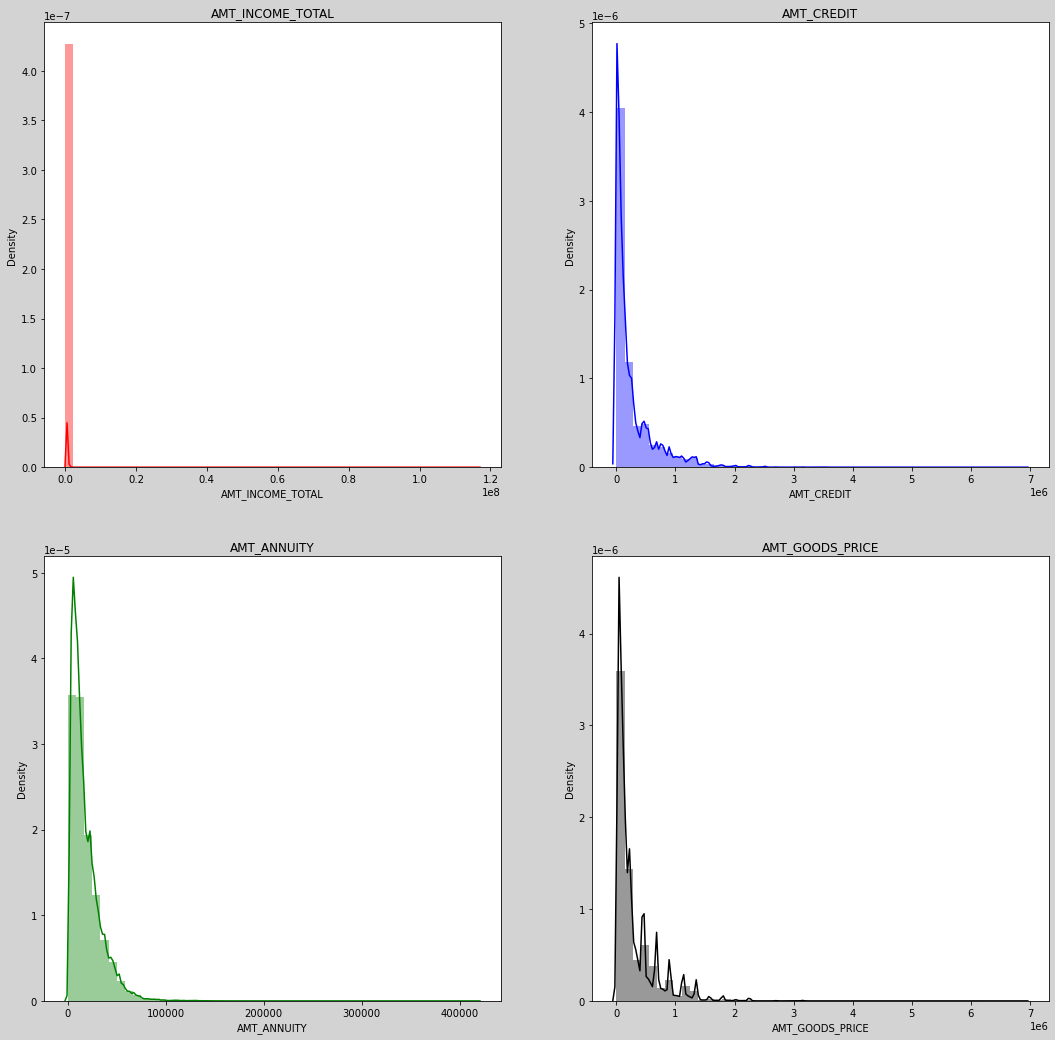

In [121]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']
length = len(cols)
cs = ["r","b","g","k"]

ax = plt.figure(figsize=(18,18))
ax.set_facecolor("lightgrey")
for i,j,k in ite.zip_longest(cols,range(length),cs):
    plt.subplot(2,2,j+1)
    sns.distplot(Data[Data[i].notnull()][i],color=k)
    #plt.axvline(Data[i].mean(),label = "mean",linestyle="dashed",color="k")
    #plt.legend(loc="best")
    plt.title(i)
    plt.subplots_adjust(hspace = .2)

### Comparing summary statistics between defaulters and non - defaulters for loan amounts.

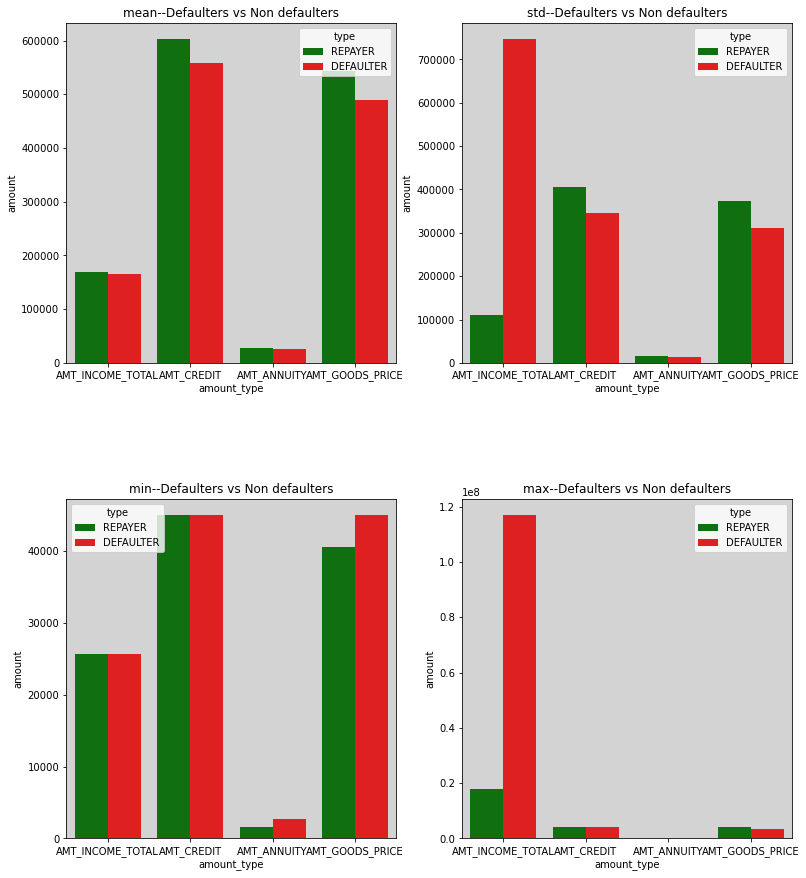

In [122]:
df = Application.groupby("TARGET")[cols].describe().transpose().reset_index()
df = df[df["level_1"].isin([ 'mean', 'std', 'min', 'max'])] 
df_x = df[["level_0","level_1",0]]
df_y = df[["level_0","level_1",1]]
df_x = df_x.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 0:"amount"})
df_x["type"] = "REPAYER"
df_y = df_y.rename(columns={'level_0':"amount_type", 'level_1':"statistic", 1:"amount"})
df_y["type"] = "DEFAULTER"
df_new = pd.concat([df_x,df_y],axis = 0)

stat = df_new["statistic"].unique().tolist()
length = len(stat)

plt.figure(figsize=(13,15))
for i,j in ite.zip_longest(stat,range(length)):
    plt.subplot(2,2,j+1)
    fig = sns.barplot(df_new[df_new["statistic"] == i]["amount_type"],df_new[df_new["statistic"] == i]["amount"],
                hue=df_new[df_new["statistic"] == i]["type"],palette=["g","r"])
    plt.title(i + "--Defaulters vs Non defaulters")
    plt.subplots_adjust(hspace = .4)
    fig.set_facecolor("lightgrey")

#### Point to infer
Income of client 

1 . Average income of clients who default and who do not are almost same.

2 . Standard deviation in income of client who default is very high compared to who do not default.

3 . Clients who default also has maximum income earnings

### Average Income,credit,annuity & goods_price by gender

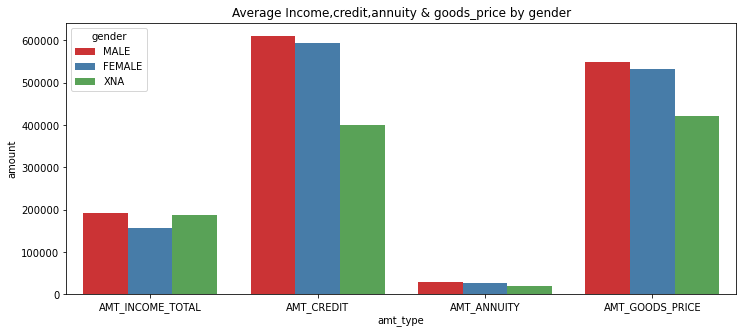

In [124]:
cols = [ 'AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE']

df1 = Data.groupby("CODE_GENDER")[cols].mean().transpose().reset_index()

df_f   = df1[["index","F"]]
df_f   = df_f.rename(columns={'index':"amt_type", 'F':"amount"})
df_f["gender"] = "FEMALE"
df_m   = df1[["index","M"]]
df_m   = df_m.rename(columns={'index':"amt_type", 'M':"amount"})
df_m["gender"] = "MALE"
df_xna = df1[["index","XNA"]]
df_xna = df_xna.rename(columns={'index':"amt_type", 'XNA':"amount"})
df_xna["gender"] = "XNA"

df_gen = pd.concat([df_m,df_f,df_xna],axis=0)

plt.figure(figsize=(12,5))
ax = sns.barplot("amt_type","amount",data=df_gen,hue="gender",palette="Set1")
plt.title("Average Income,credit,annuity & goods_price by gender")
plt.show()

### Scatter plot between credit amount and annuity amount

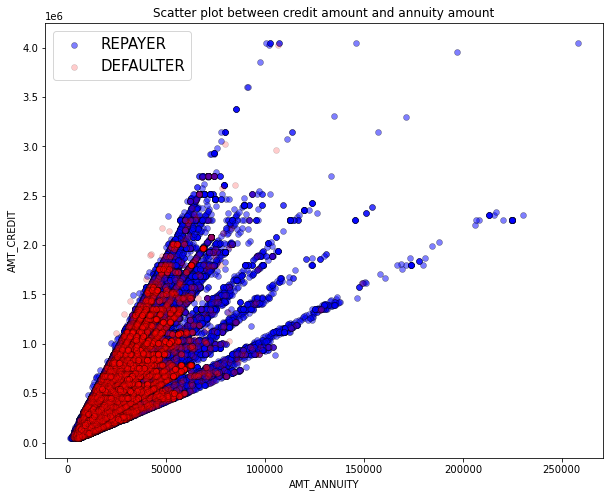

In [125]:
plt.figure(figsize=(10,8))
plt.scatter(Application[Application["TARGET"]==0]['AMT_ANNUITY'],Application[Application["TARGET"]==0]['AMT_CREDIT'],s=35,
color="b",alpha=.5,label="REPAYER",linewidth=.5,edgecolor="k")
plt.scatter(Application[Application["TARGET"]==1]['AMT_ANNUITY'],Application[Application["TARGET"]==1]['AMT_CREDIT'],s=35,
color="r",alpha=.2,label="DEFAULTER",linewidth=.5,edgecolor="k")
plt.legend(loc="best",prop={"size":15})
plt.xlabel("AMT_ANNUITY")
plt.ylabel("AMT_CREDIT")
plt.title("Scatter plot between credit amount and annuity amount")
plt.show()

### Pair Plot between amount variables

AMT_INCOME_TOTAL - Income of the client

AMT_CREDIT - Credit amount of the loan

AMT_ANNUITY - Loan annuity

AMT_GOODS_PRICE - For consumer loans it is the price of the goods for which the loan is given

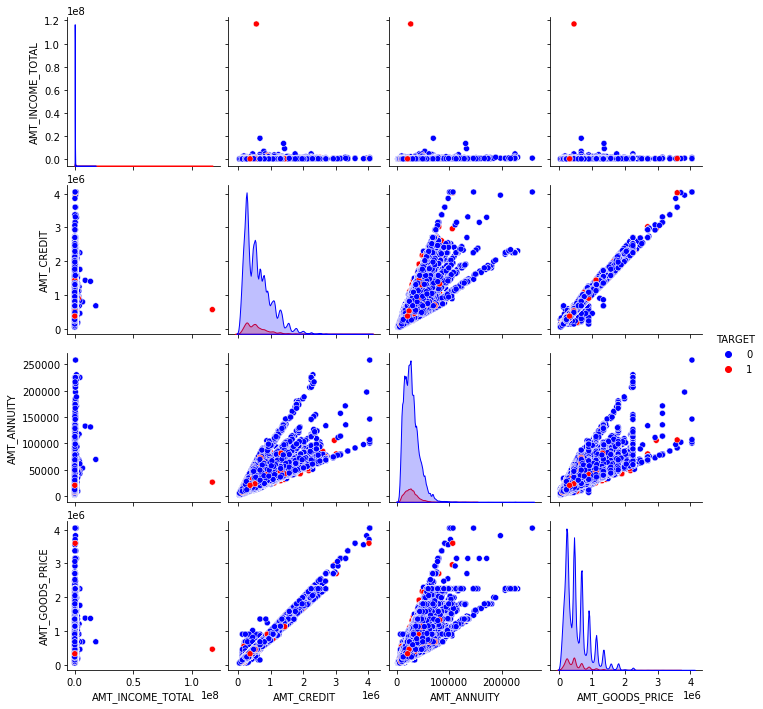

In [127]:
amt = Application[[ 'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',"TARGET"]]
amt = amt[(amt["AMT_GOODS_PRICE"].notnull()) & (amt["AMT_ANNUITY"].notnull())]
sns.pairplot(amt,hue="TARGET",palette=["b","r"])
plt.show()

### Distribution of Suite type
NAME_TYPE_SUITE - Who was accompanying client when he was applying for the loan.

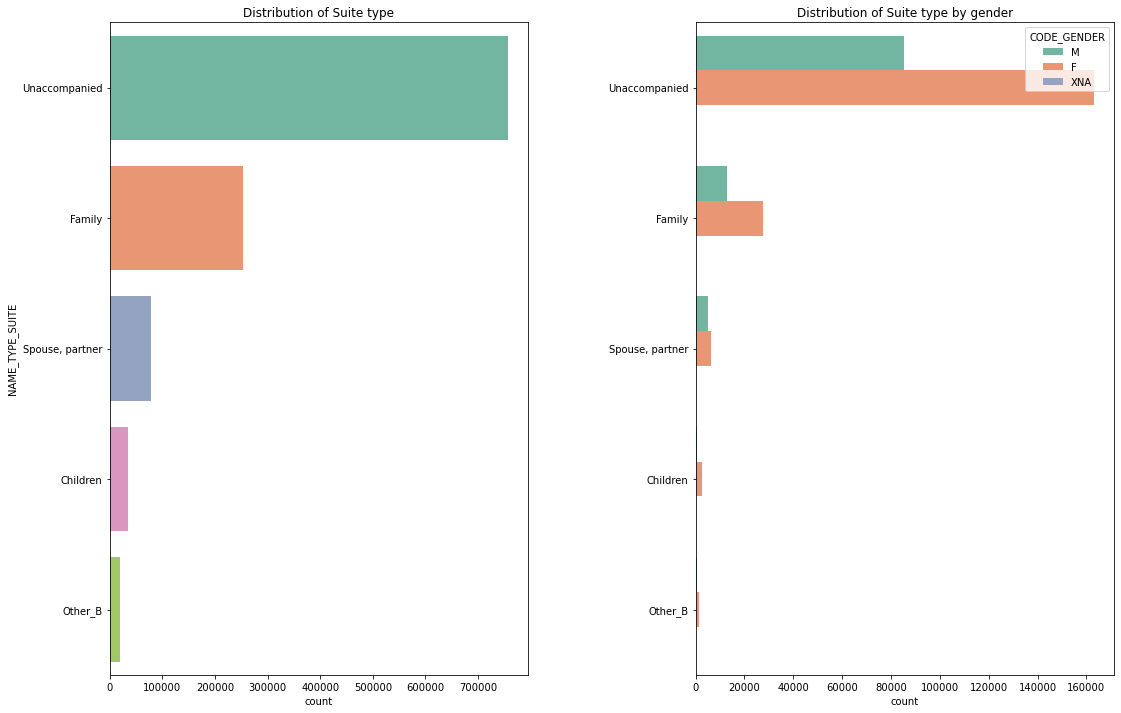

In [128]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=Data["NAME_TYPE_SUITE"],palette="Set2",order=Data["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.title("Distribution of Suite type")

plt.subplot(122)
sns.countplot(y=Data["NAME_TYPE_SUITE"],hue=Data["CODE_GENDER"],palette="Set2",order=Data["NAME_TYPE_SUITE"].value_counts().index[:5])
plt.ylabel("")
plt.title("Distribution of Suite type by gender")
plt.subplots_adjust(wspace = .4)

### Distribution of client income type

NAME_INCOME_TYPE Clients income type (businessman, working, maternity leave,…)

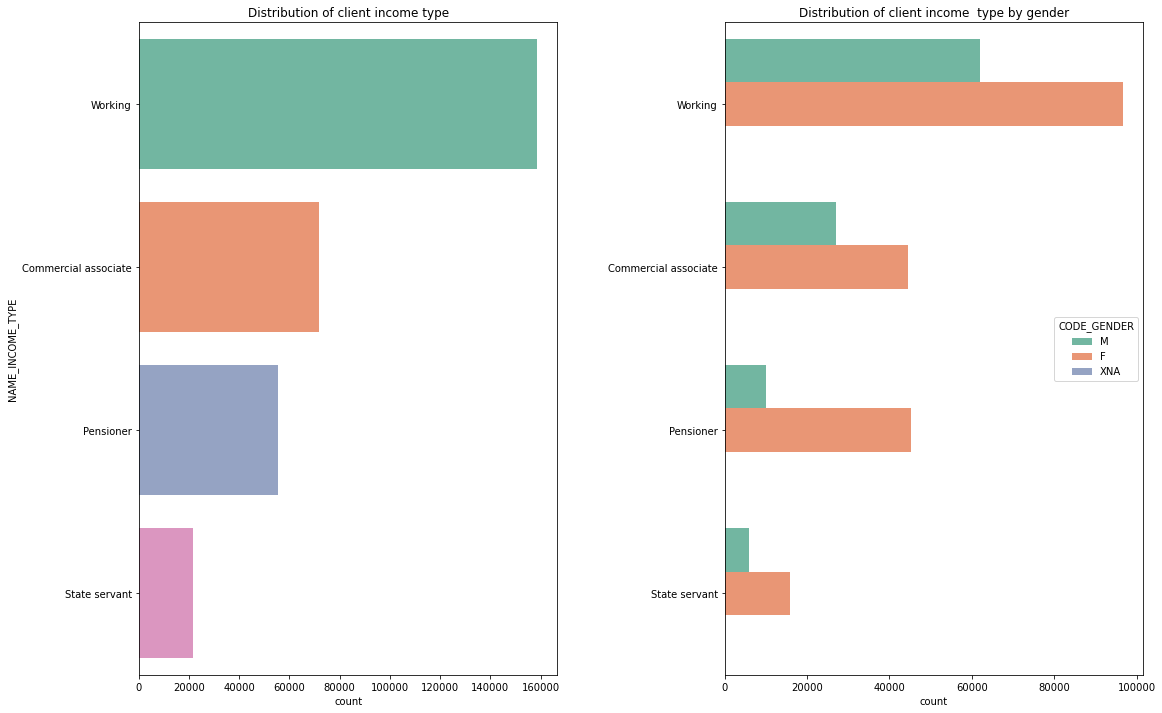

In [129]:
plt.figure(figsize=(18,12))
plt.subplot(121)
sns.countplot(y=Data["NAME_INCOME_TYPE"],palette="Set2",order=Data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.title("Distribution of client income type")

plt.subplot(122)
sns.countplot(y=Data["NAME_INCOME_TYPE"],hue=Data["CODE_GENDER"],palette="Set2",order=Data["NAME_INCOME_TYPE"].value_counts().index[:4])
plt.ylabel("")
plt.title("Distribution of client income  type by gender")
plt.subplots_adjust(wspace = .4)

### Distribution of Education type by loan repayment status
NAME_EDUCATION_TYPE Level of highest education the client achieved..

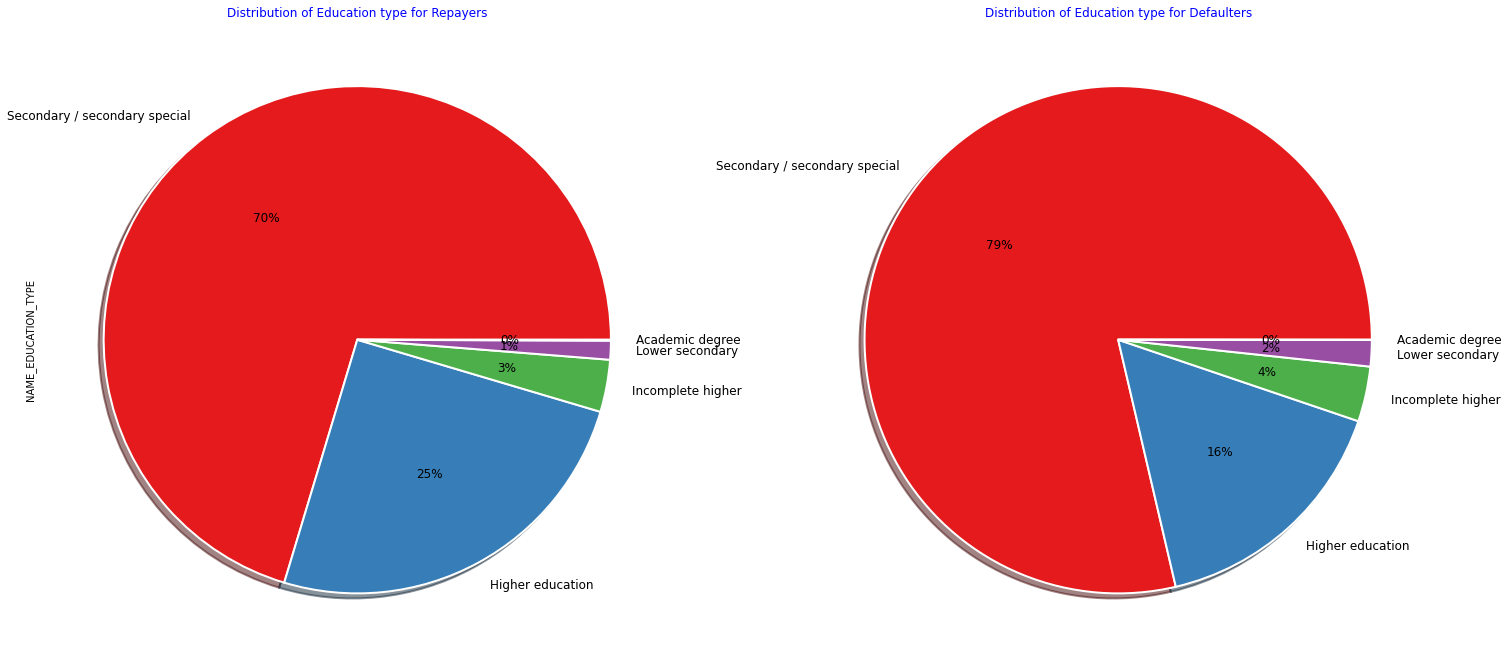

In [131]:
plt.figure(figsize=(25,25))
plt.subplot(121)
Application[Application["TARGET"]==0]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
colors = sns.color_palette("Set1"),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of Education type for Repayers",color="b")

plt.subplot(122)
Application[Application["TARGET"]==1]["NAME_EDUCATION_TYPE"].value_counts().plot.pie(fontsize=12,autopct = "%1.0f%%",
colors = sns.color_palette("Set1"),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of Education type for Defaulters",color="b")
plt.ylabel("")
plt.show()

#### Point to infer
Clients who default have proportionally 9% less higher education compared to clients who do not default.

### Average Earnings by different professions and education types

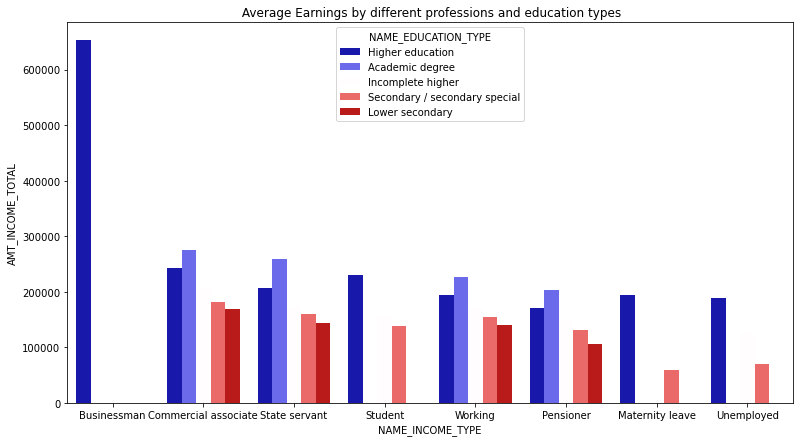

In [135]:
edu = Data.groupby(['NAME_EDUCATION_TYPE','NAME_INCOME_TYPE'])['AMT_INCOME_TOTAL'].mean().reset_index().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
plt.figure(figsize=(13,7))
ax = sns.barplot('NAME_INCOME_TYPE','AMT_INCOME_TOTAL',data=edu,hue='NAME_EDUCATION_TYPE',palette="seismic")
plt.title(" Average Earnings by different professions and education types")
plt.show()

### Distribution of Education type by loan repayment status
NAME_FAMILY_STATUS - Family status of the client

In [136]:
plt.figure(figsize=(16,8))
plt.subplot(121)
Application[Application["TARGET"]==0]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
startangle=120,colors = sns.color_palette("Set2",7),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0,0])

plt.title("Distribution of Family status for Repayers",color="b")

plt.subplot(122)
Application[Application["TARGET"]==1]["NAME_FAMILY_STATUS"].value_counts().plot.pie(autopct = "%1.0f%%",
startangle=120,colors = sns.color_palette("Set2",7),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True,explode=[0,.07,0,0,0])


plt.title("Distribution of Family status for Defaulters",color="b")
plt.ylabel("")
plt.show()

#### Point to infer from the graph
Percentage of single people are more in defaulters than non defaulters.

### Distribution of Housing type by loan repayment status
NAME_HOUSING_TYPE - What is the housing situation of the client (renting, living with parents, ...)

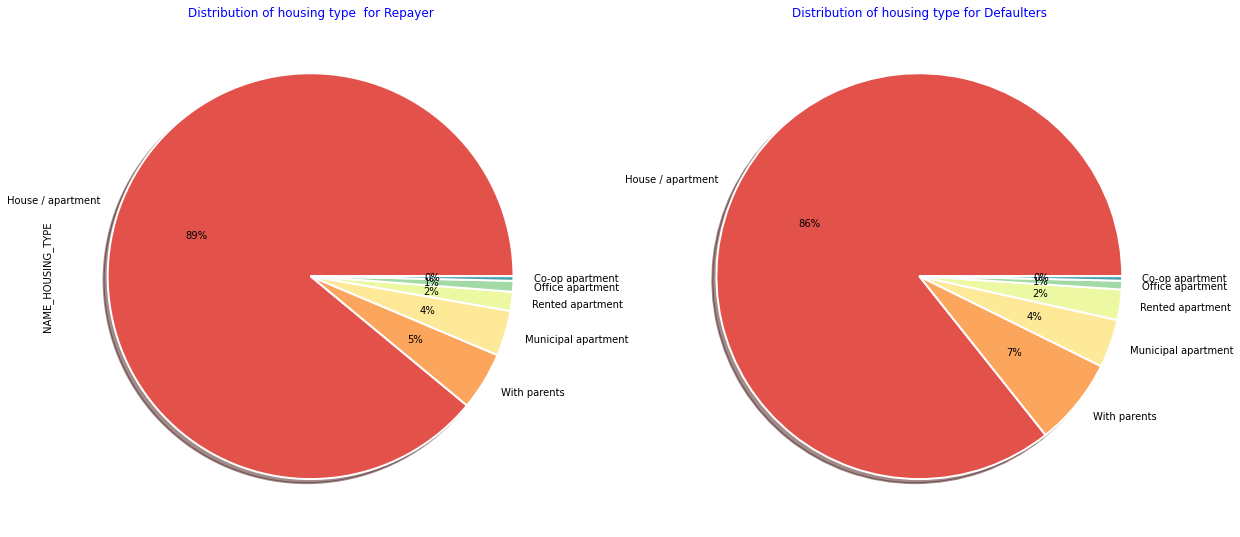

In [138]:
plt.figure(figsize=(20,20))
plt.subplot(121)
Application[Application["TARGET"]==0]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
colors = sns.color_palette("Spectral"),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of housing type  for Repayer",color="b")

plt.subplot(122)
Application[Application["TARGET"]==1]["NAME_HOUSING_TYPE"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=10,
colors = sns.color_palette("Spectral"),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of housing type for Defaulters",color="b")
plt.ylabel("")
plt.show()

### Distribution normalized population of region where client lives by loan repayment status
REGION_POPULATION_RELATIVE - Normalized population of region where client lives (higher number means the client lives in more populated region).

In [139]:
 plt.figure(figsize=(13,8))

plt.subplot(121)
sns.boxplot(y=Application[Application["TARGET"]==0]["REGION_POPULATION_RELATIVE"],
x=Application[Application["TARGET"]==0]["NAME_CONTRACT_TYPE"],palette="Set1")
plt.title("Distribution of region population for Non Default loans",color="b")

plt.subplot(122)
sns.boxplot(y = Application[Application["TARGET"]==1]["REGION_POPULATION_RELATIVE"],
x=Application[Application["TARGET"]==1]["NAME_CONTRACT_TYPE"],palette="Set1")
plt.title("Distribution of region population  for  Default loans",color="b")

plt.subplots_adjust(wspace = .2)
fig.set_facecolor("lightgrey")

#### Point to infer
In High population density regions people are less likely to default on loans.

### Client's age
DAYS_BIRTH - Client's age in days at the time of application.

In [141]:
plt.figure(figsize=(13,15))

plt.subplot(221)
sns.distplot(Application[Application["TARGET"]==0]["DAYS_BIRTH"],color="b")
plt.title("Age Distribution of repayers")

plt.subplot(222)
sns.distplot(Application[Application["TARGET"]==1]["DAYS_BIRTH"],color="r")
plt.title("Age Distribution of defaulters")

plt.subplot(223)
sns.boxplot(Application["TARGET"],Application["DAYS_BIRTH"],hue=Application["CODE_GENDER"],palette=["b","grey","m"])
plt.axhline(Application["DAYS_BIRTH"].mean(),linestyle="dashed",color="k",label ="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=gender)")

plt.subplot(224)
sns.boxplot(Application["TARGET"],Application["DAYS_BIRTH"],hue=Application["NAME_CONTRACT_TYPE"],palette=["r","g"])
plt.axhline(Application["DAYS_BIRTH"].mean(),linestyle="dashed",color="k",label ="average age of client")
plt.legend(loc="lower right")
plt.title("Client age vs Loan repayment status(hue=contract type)")

plt.subplots_adjust(wspace = .2,hspace = .3)


#### Point to infer
Average clients age is comparatively less in non repayers than repayers in every aspect.

Younger people tend to default more than elder people.

### Distribution of days employed for target variable.
DAYS_EMPLOYED - How many days before the application for target variable the person started current employment

In [142]:
plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(Application[Application["TARGET"]==0]["DAYS_EMPLOYED"],color="b")
plt.title("days employed distribution of repayers")

plt.subplot(122)
sns.distplot(Application[Application["TARGET"]==1]["DAYS_EMPLOYED"],color="r")
plt.title("days employed distribution of defaulters")

Text(0.5, 1.0, 'days employed distribution of defaulters')

### Distribution of registration days for target variable.
DAYS_REGISTRATION How many days before the application did client change his registration

In [144]:
plt.figure(figsize=(13,5))

plt.subplot(121)
sns.distplot(Application[Application["TARGET"]==0]["DAYS_REGISTRATION"],color="b")
plt.title("registration days distribution of repayers")

plt.subplot(122)
sns.distplot(Application[Application["TARGET"]==1]["DAYS_REGISTRATION"],color="r")
plt.title("registration days distribution of defaulter")


Text(0.5, 1.0, 'registration days distribution of defaulter')

### Distribution in contact information provided by client
FLAG_MOBIL - Did client provide mobile phone (1=YES, 0=NO)

FLAG_EMP_PHONE - Did client provide work phone (1=YES, 0=NO)

FLAG_WORK_PHONE - Did client provide home phone (1=YES, 0=NO)

FLAG_CONT_MOBILE - Was mobile phone reachable (1=YES, 0=NO)

FLAG_PHONE - Did client provide home phone (1=YES, 0=NO)

FLAG_EMAIL - Did client provide email (1=YES, 0=NO)

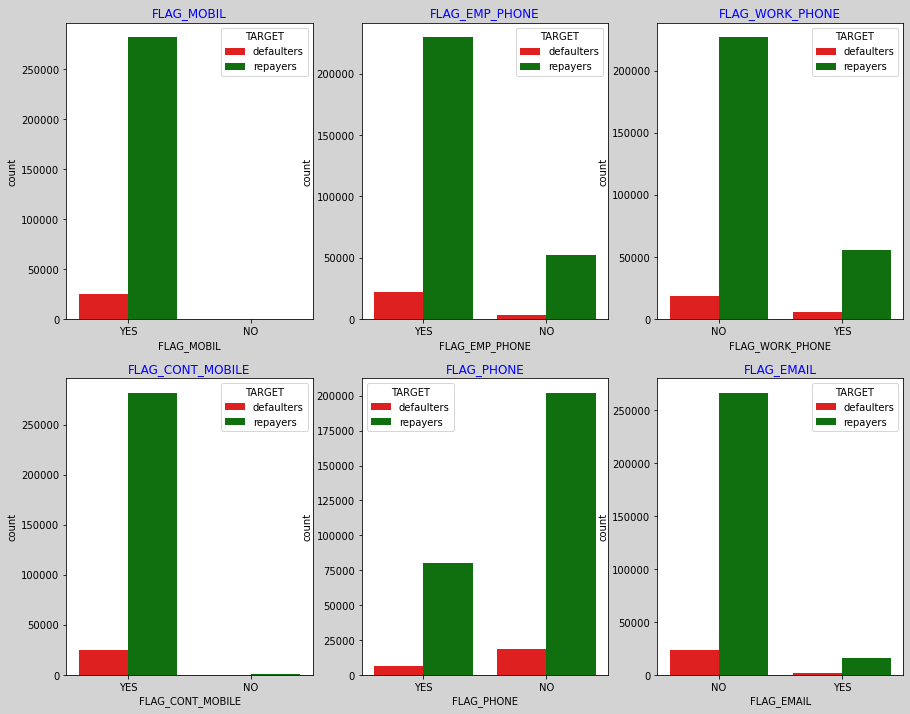

In [145]:
x = Application[['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE', 'FLAG_EMAIL',"TARGET"]]
x["TARGET"] = x["TARGET"].replace({0:"repayers",1:"defaulters"})
x = x.replace({1:"YES",0:"NO"})

cols = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL']
length = len(cols)

fig=plt.figure(figsize=(15,12))
fig.set_facecolor("lightgrey")

for i,j in ite.zip_longest(cols,range(length)):
    plt.subplot(2,3,j+1)
    sns.countplot(x[i],hue=x["TARGET"],palette=["r","g"])
    plt.title(i,color="b")

### Distribution of registration days for target variable.
REGION_RATING_CLIENT - Home credit rating of the region where client lives (1,2,3).

REGION_RATING_CLIENT_W_CITY - Home credit rating of the region where client lives with taking city into account (1,2,3). Percentage of defaulters are less in 1-rated regions compared to repayers.

In [146]:
plt.figure(figsize=(13,13))
plt.subplot(221)
Application[Application["TARGET"]==0]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
colors = sns.color_palette("Pastel1"),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of region rating  for Repayers",color="b")

plt.subplot(222)
Application[Application["TARGET"]==1]["REGION_RATING_CLIENT"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
colors = sns.color_palette("Pastel1"), wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of region rating  for Defaulters",color="b")
plt.ylabel("")

plt.subplot(223)
Application[Application["TARGET"]==0]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
colors = sns.color_palette("Paired"),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)

plt.title("Distribution of city region rating   for Repayers",color="b")

plt.subplot(224)
Application[Application["TARGET"]==1]["REGION_RATING_CLIENT_W_CITY"].value_counts().plot.pie(autopct = "%1.0f%%",fontsize=12,
colors = sns.color_palette("Paired"),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)


plt.title("Distribution of city region rating  for Defaulters",color="b")
plt.ylabel("")

Text(0, 0.5, '')

#### Point to infer from the graph
Percentage of defaulters are less in 1-rated regions compared to repayers.

Percentage of defaulters are more in 3-rated regions compared to repayers.

### Peak days and hours for applying loans (defaulters vs repayers)
WEEKDAY_APPR_PROCESS_START - On which day of the week did the client apply for the loan.

HOUR_APPR_PROCESS_START - Approximately at what hour did the client apply for the loan.

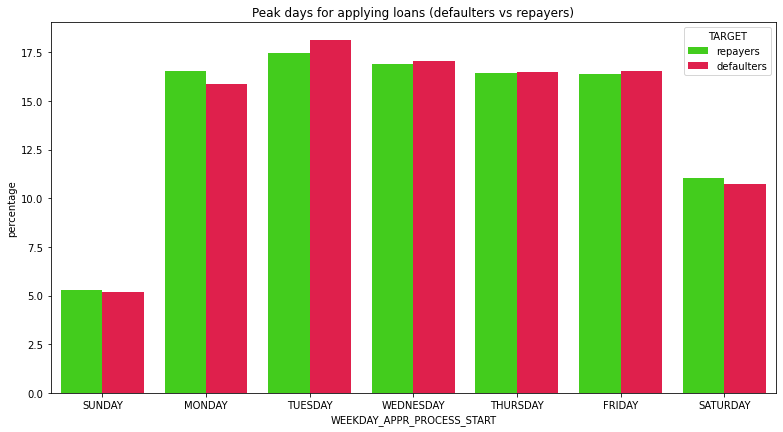

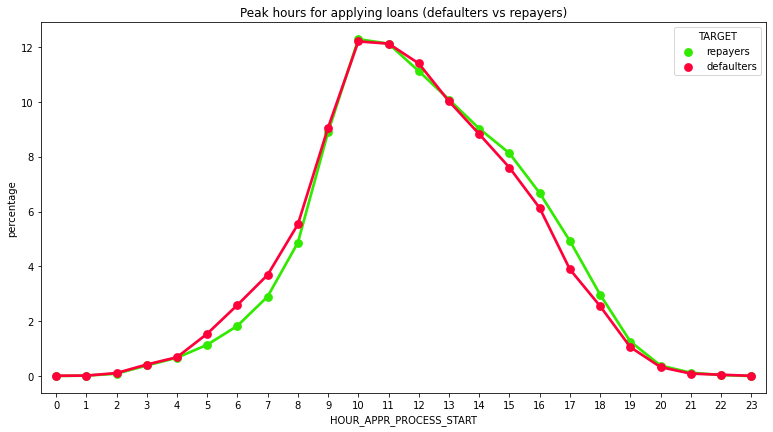

In [153]:
day = Application.groupby("TARGET").agg({"WEEKDAY_APPR_PROCESS_START":"value_counts"})
day = day.rename(columns={"WEEKDAY_APPR_PROCESS_START":"value_counts"})
day = day.reset_index()
day_0 = day[:7]
day_1 = day[7:]
day_0["percentage"] = day_0["value_counts"]*100/day_0["value_counts"].sum()
day_1["percentage"] = day_1["value_counts"]*100/day_1["value_counts"].sum()
days = pd.concat([day_0,day_1],axis=0)
days["TARGET"] = days.replace({1:"defaulters",0:"repayers"})
                              
plt.figure(figsize=(13,15))
plt.subplot(211)
order = ['SUNDAY', 'MONDAY','TUESDAY', 'WEDNESDAY','THURSDAY', 'FRIDAY', 'SATURDAY']
ax= sns.barplot("WEEKDAY_APPR_PROCESS_START","percentage",data=days,hue="TARGET",order=order,palette="prism")
ax.set_title("Peak days for applying loans (defaulters vs repayers)")
                              
hr = Application.groupby("TARGET").agg({"HOUR_APPR_PROCESS_START":"value_counts"})
hr = hr.rename(columns={"HOUR_APPR_PROCESS_START":"value_counts"}).reset_index()
hr_0 = hr[hr["TARGET"]==0]
hr_1 = hr[hr["TARGET"]==1]
hr_0["percentage"] = hr_0["value_counts"]*100/hr_0["value_counts"].sum()
hr_1["percentage"] = hr_1["value_counts"]*100/hr_1["value_counts"].sum()
hrs = pd.concat([hr_0,hr_1],axis=0)
hrs["TARGET"] = hrs["TARGET"].replace({1:"defaulters",0:"repayers"})
hrs = hrs.sort_values(by="HOUR_APPR_PROCESS_START",ascending=True)

plt.figure(figsize=(13,15))
plt.subplot(212)
ax1 = sns.pointplot("HOUR_APPR_PROCESS_START","percentage",data=hrs,hue="TARGET",palette="prism")

ax1.set_title("Peak hours for applying loans (defaulters vs repayers)")
fig.set_facecolor("snow")

#### Point to infer
On tuesdays , percentage of defaulters applying for loans is greater than that of repayers.

From morning 4'O clock to 9'O clock percentage of defaulters applying for loans is greater than that of repayers.

### Distribution in organization types for repayers and defaulters
ORGANIZATION_TYPE - Type of organization where client works.

In [155]:
org = Application.groupby("TARGET").agg({"ORGANIZATION_TYPE":"value_counts"})
org = org.rename(columns = {"ORGANIZATION_TYPE":"value_counts"}).reset_index()
org_0 = org[org["TARGET"] == 0]
org_1 = org[org["TARGET"] == 1]
org_0["percentage"] = org_0["value_counts"]*100/org_0["value_counts"].sum()
org_1["percentage"] = org_1["value_counts"]*100/org_1["value_counts"].sum()

organization = pd.concat([org_0,org_1],axis=0)
organization = organization.sort_values(by="ORGANIZATION_TYPE",ascending=True)

organization["TARGET"] = organization["TARGET"].replace({0:"repayers",1:"defaulters"})

organization
plt.figure(figsize=(13,7))
ax = sns.pointplot("ORGANIZATION_TYPE","percentage",data=organization,hue="TARGET",palette=["b","r"])
plt.xticks(rotation=90)
plt.grid(True,alpha=.3)

ax.set_title("Distribution in organization types for repayers and defaulters")
plt.show()

#### Point to infer 
Organizations like Business Entity Type 3,Construction,Self-employed percentage of defaulters are higher than repayers.

### Distribution client's social surroundings with observed and defaulted 30 DPD (days past due)
OBS_30_CNT_SOCIAL_CIRCLE- How many observation of client's social surroundings with observable 30 DPD (days past due) default.

DEF_30_CNT_SOCIAL_CIRCLE-How many observation of client's social surroundings defaulted on 30 DPD (days past due) .

OBS_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings with observable 60 DPD (days past due) default.

DEF_60_CNT_SOCIAL_CIRCLE - How many observation of client's social surroundings defaulted on 60 (days past due) DPD.

Text(0.5, 1.0, "Client's social surroundings defaulted on 60 DPD (days past due)")

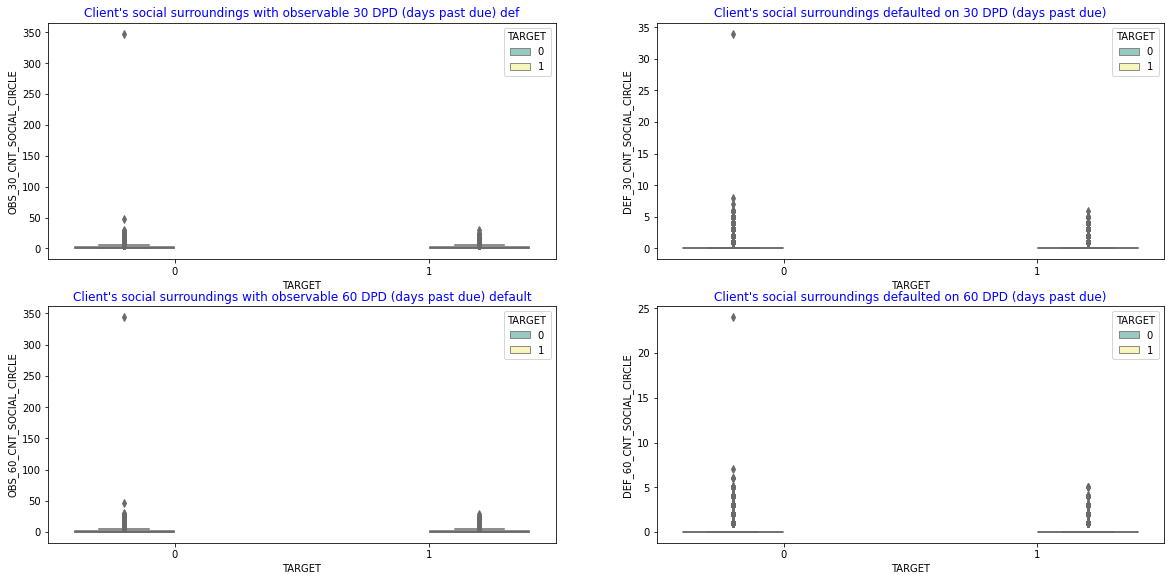

In [159]:
fig = plt.figure(figsize=(20,20))
plt.subplot(421)
sns.boxplot(data=Application,x='TARGET',y='OBS_30_CNT_SOCIAL_CIRCLE',hue="TARGET", palette="Set3")
plt.title("Client's social surroundings with observable 30 DPD (days past due) def",color="b")

plt.subplot(422)
sns.boxplot(data=Application,x='TARGET',y='DEF_30_CNT_SOCIAL_CIRCLE',hue="TARGET", palette="Set3")
plt.title("Client's social surroundings defaulted on 30 DPD (days past due)",color="b")

plt.subplot(423)
sns.boxplot(data=Application,x='TARGET',y='OBS_60_CNT_SOCIAL_CIRCLE',hue="TARGET", palette="Set3")
plt.title("Client's social surroundings with observable 60 DPD (days past due) default",color="b")

plt.subplot(424)
sns.boxplot(data=Application,x='TARGET',y='DEF_60_CNT_SOCIAL_CIRCLE', hue="TARGET", palette="Set3")
plt.title("Client's social surroundings defaulted on 60 DPD (days past due)",color="b")


### Number of days before application client changed phone .
DAYS_LAST_PHONE_CHANGE - How many days before application did client change phone.

In [160]:
plt.figure(figsize=(13,7))

plt.subplot(121)
ax = sns.boxplot(Application["TARGET"],Application["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
ax.set_facecolor("oldlace")
ax.set_title("days before application client changed phone -box plot")

plt.subplot(122)
ax1 = sns.boxplot(Application["TARGET"],Application["DAYS_LAST_PHONE_CHANGE"],palette=["g","r"])
ax1.set_facecolor("oldlace")
ax1.set_ylabel("")
ax1.set_title("days before application client changed phone -box plot")
plt.subplots_adjust(wspace = .2)

#### Point to infer from the graph
Average days of defaulters phone change is less than average days of repayers phone change

### Documents provided by the clients.
FLAG_DOCUMENT - Did client provide documents.(1,0)

In [162]:
cols = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag = Application[cols+["TARGET"]]

length = len(cols)

df_flag["TARGET"] = df_flag["TARGET"].replace({1:"defaulter",0:"repayer"})

fig = plt.figure(figsize=(13,24))
fig.set_facecolor("lightgrey")
for i,j in ite.zip_longest(cols,range(length)):
    plt.subplot(5,4,j+1)
    ax = sns.countplot(df_flag[i],hue=df_flag["TARGET"],palette=["r","b"])
    plt.yticks(fontsize=5)
    plt.xlabel("")
    plt.title(i)
  

### Equiries to Credit Bureau about the client before application.¶
AMT_REQ_CREDIT_BUREAU_HOUR - Number of enquiries to Credit Bureau about the client one hour before application.

AMT_REQ_CREDIT_BUREAU_DAY - Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application).

AMT_REQ_CREDIT_BUREAU_WEEK - Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application).

AMT_REQ_CREDIT_BUREAU_MON - Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application).

AMT_REQ_CREDIT_BUREAU_QRT - Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application).

AMT_REQ_CREDIT_BUREAU_YEAR - Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application).

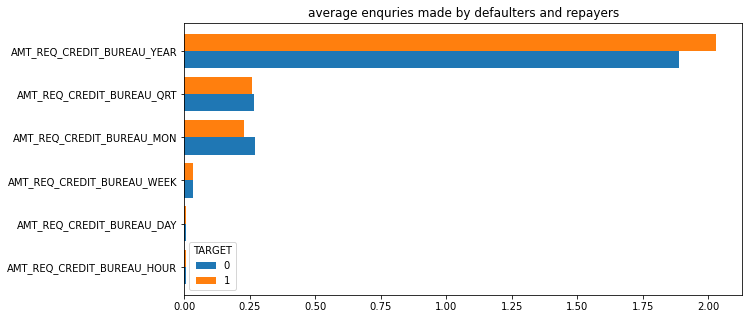

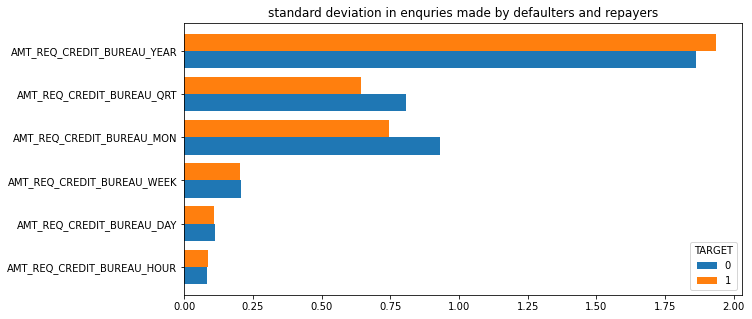

In [163]:
cols = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

Application.groupby("TARGET")[cols].max().transpose().plot(kind="barh",figsize=(10,5),width=.8)
plt.title("Maximum enquries made by defaulters and repayers")

Application.groupby("TARGET")[cols].mean().transpose().plot(kind="barh",figsize=(10,5),width=.8)
plt.title("average enquries made by defaulters and repayers")

Application.groupby("TARGET")[cols].std().transpose().plot(kind="barh",figsize=(10,5),width=.8)
plt.title("standard deviation in enquries made by defaulters and repayers")
plt.show()

### Current loan id having previous loan applications.
SK_ID_PREV - ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit).

SK_ID_CURR ID of loan in our sample.

In [164]:
x = Previous_Application.groupby("SK_ID_CURR")["SK_ID_PREV"].count().reset_index()
plt.figure(figsize=(13,7))
ax = sns.distplot(x["SK_ID_PREV"],color="orange")
plt.axvline(x["SK_ID_PREV"].mean(),linestyle="dashed",color="r",label="average")
plt.axvline(x["SK_ID_PREV"].std(),linestyle="dashed",color="b",label="standard deviation")
plt.axvline(x["SK_ID_PREV"].max(),linestyle="dashed",color="g",label="maximum")
plt.legend(loc="best")
plt.title("Current loan id having previous loan applications")


Text(0.5, 1.0, 'Current loan id having previous loan applications')

### Point to infer 
On average current loan ids have 4 to 5 loan applications previously

### Previous loan amounts applied and loan amounts credited.
AMT_APPLICATION-For how much credit did client ask on the previous application.

AMT_CREDIT-Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT.

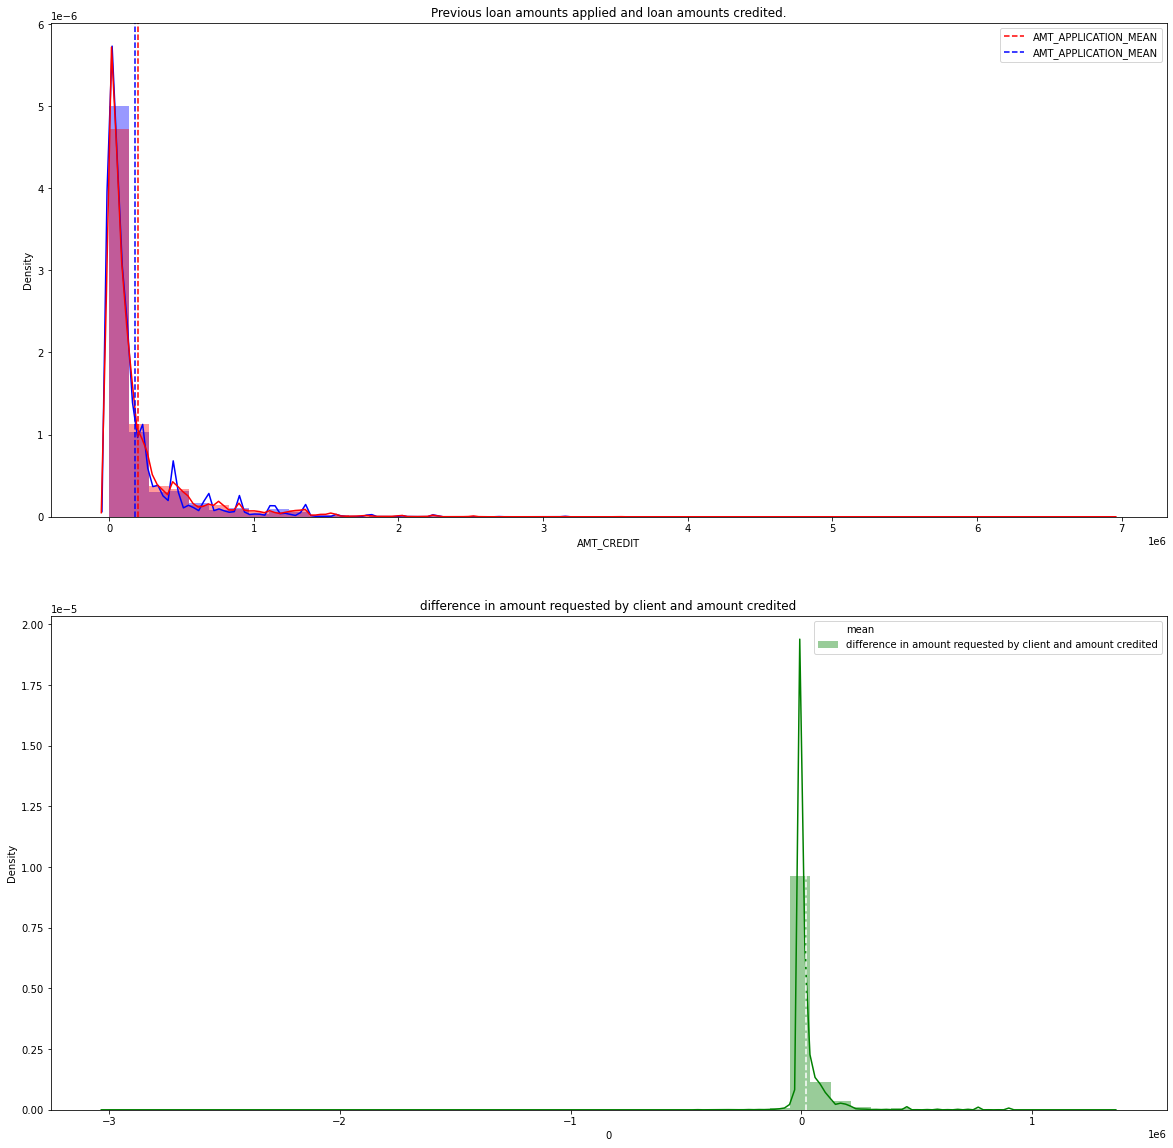

In [168]:
plt.figure(figsize=(20,20))
plt.subplot(211)
ax = sns.distplot(Previous_Application["AMT_APPLICATION"],color="b")
ax = sns.distplot(Previous_Application[Previous_Application["AMT_CREDIT"].notnull()]["AMT_CREDIT"],color="r")
plt.axvline(Previous_Application[Previous_Application["AMT_CREDIT"].notnull()]["AMT_CREDIT"].mean(),color="r",linestyle="dashed",label="AMT_APPLICATION_MEAN")
plt.axvline(Previous_Application["AMT_APPLICATION"].mean(),color="b",linestyle="dashed",label="AMT_APPLICATION_MEAN")
plt.legend(loc="best")
plt.title("Previous loan amounts applied and loan amounts credited.")

plt.subplot(212)
diff = (Previous_Application["AMT_CREDIT"] - Previous_Application["AMT_APPLICATION"]).reset_index()
diff = diff[diff[0].notnull()]
ax1 = sns.distplot(diff[0],color="g",label = "difference in amount requested by client and amount credited")
plt.axvline(diff[0].mean(),color="white",linestyle="dashed",label = "mean")
plt.title("difference in amount requested by client and amount credited")
ax1.legend(loc="best")

### Total and average amounts applied and credited in previous applications
AMT_APPLICATION-For how much credit did client ask on the previous application. >AMT_CREDIT-Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client.

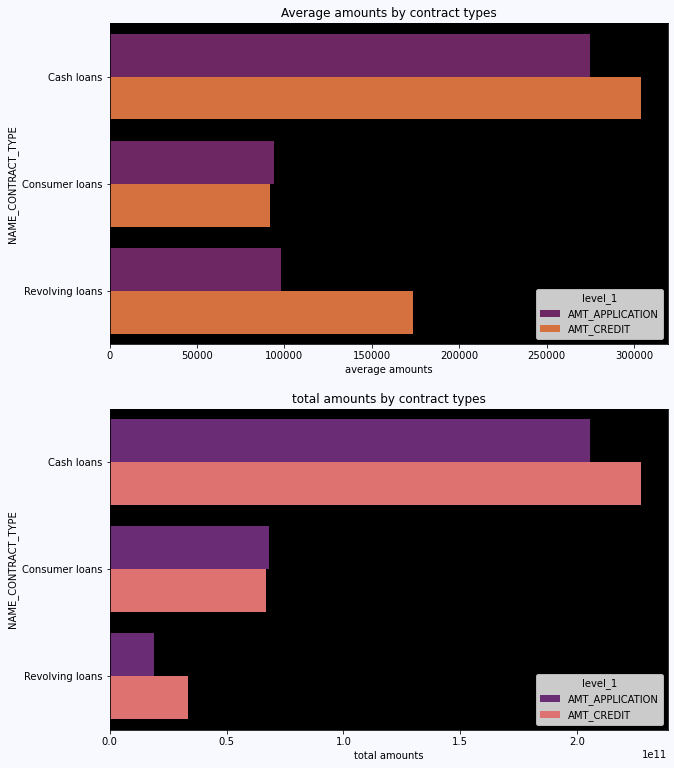

In [169]:
mn = Previous_Application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].mean().stack().reset_index()
tt = Previous_Application.groupby("NAME_CONTRACT_TYPE")[["AMT_APPLICATION","AMT_CREDIT"]].sum().stack().reset_index()
fig = plt.figure(figsize=(10,13))
fig.set_facecolor("ghostwhite")
plt.subplot(211)
ax = sns.barplot(0,"NAME_CONTRACT_TYPE",data=mn[:6],hue="level_1",palette="inferno")
ax.set_facecolor("k")
ax.set_xlabel("average amounts")
ax.set_title("Average amounts by contract types")

plt.subplot(212)
ax1 = sns.barplot(0,"NAME_CONTRACT_TYPE",data=tt[:6],hue="level_1",palette="magma")
ax1.set_facecolor("k")
ax1.set_xlabel("total amounts")
ax1.set_title("total amounts by contract types")
plt.subplots_adjust(hspace = .2)
plt.show()

### Annuity of previous application
AMT_ANNUITY - Annuity of previous application

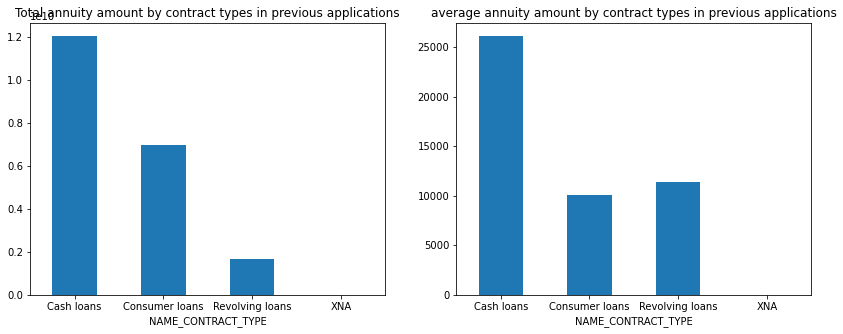

In [170]:
plt.figure(figsize=(14,5))
plt.subplot(121)
Previous_Application.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].sum().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Total annuity amount by contract types in previous applications")
plt.subplot(122)
Previous_Application.groupby("NAME_CONTRACT_TYPE")["AMT_ANNUITY"].mean().plot(kind="bar")
plt.title("average annuity amount by contract types in previous applications")
plt.xticks(rotation=0)
plt.show()

### Count of application status by application type.
NAME_CONTRACT_TYPE -Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application.

NAME_CONTRACT_STATUS -Contract status (approved, cancelled, ...) of previous application.

In [172]:
ax = pd.crosstab(Previous_Application["NAME_CONTRACT_TYPE"],Previous_Application["NAME_CONTRACT_STATUS"]).plot(kind="barh",figsize=(10,7),stacked=True)
plt.xticks(rotation =0)
plt.ylabel("count")
plt.title("Count of application status by application type")


Text(0.5, 1.0, 'Count of application status by application type')

#### Point to infer from the graph
Consumer loan applications are most approved loans and cash loans are most cancelled and refused loans.

### Contract status by weekdays
WEEKDAY_APPR_PROCESS_START - On which day of the week did the client apply for previous application

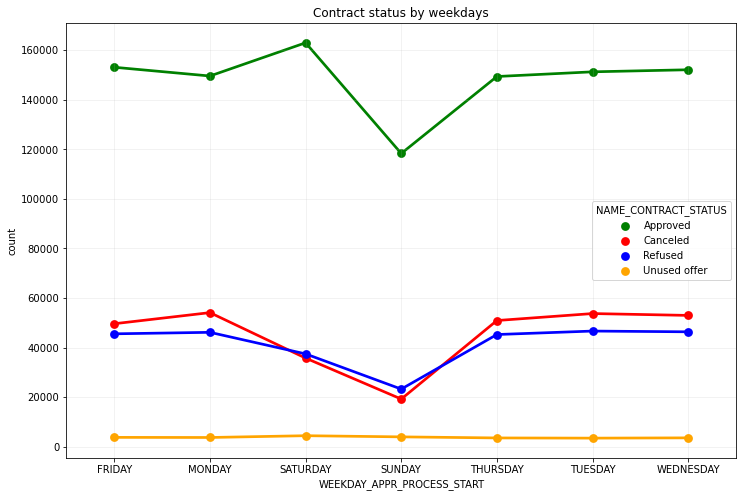

In [173]:
hr = pd.crosstab(Previous_Application["WEEKDAY_APPR_PROCESS_START"],Previous_Application["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["WEEKDAY_APPR_PROCESS_START"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"],scale=1)

ax.set_ylabel("count")
ax.set_title("Contract status by weekdays")
plt.grid(True,alpha=.2)

### Contract status by hour of the day
HOUR_APPR_PROCESS_START - Approximately at what day hour did the client apply for the previous application.

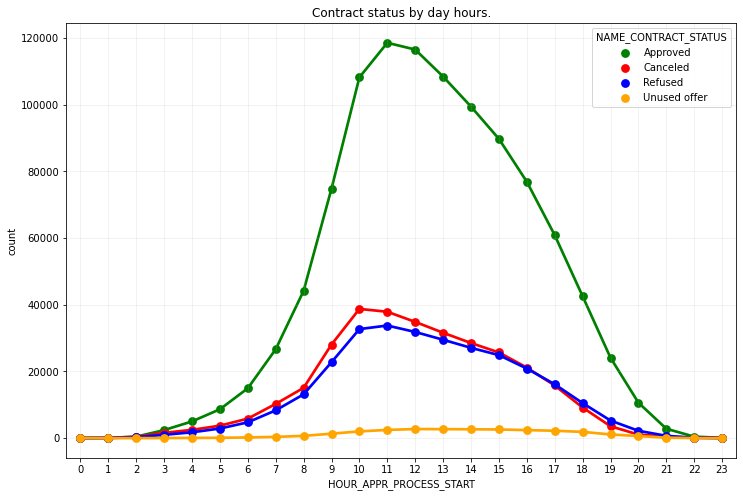

In [174]:
hr = pd.crosstab(Previous_Application["HOUR_APPR_PROCESS_START"],Previous_Application["NAME_CONTRACT_STATUS"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START"],hr[0],hue=hr["NAME_CONTRACT_STATUS"],palette=["g","r","b","orange"],scale=1)

ax.set_ylabel("count")
ax.set_title("Contract status by day hours.")
plt.grid(True,alpha=.2)

#### Point to infer 
Morning 11'o clock have maximum number of approvals.

Morning 10'o clock have maximum number of refused and cancelled contracts.

### Peak hours for week days for applying loans

In [176]:
hr = pd.crosstab(Previous_Application["HOUR_APPR_PROCESS_START"],Previous_Application["WEEKDAY_APPR_PROCESS_START"]).stack().reset_index()
plt.figure(figsize=(12,8))
ax = sns.pointplot(hr["HOUR_APPR_PROCESS_START"],hr[0],hue=hr["WEEKDAY_APPR_PROCESS_START"],palette=["g","r","b","orange"],scale=1)

ax.set_ylabel("count")
ax.set_title("Peak hours for week days")
plt.grid(True,alpha=.2)

### Percentage of applications accepted,cancelled,refused and unused for different loan purposes.
NAME_CASH_LOAN_PURPOSE - Purpose of the cash loan.

NAME_CONTRACT_STATUS - Contract status (approved, cancelled, ...) of previous application.

In [178]:
Previous_Application[["NAME_CASH_LOAN_PURPOSE","NAME_CONTRACT_STATUS"]]
purpose = pd.crosstab(Previous_Application["NAME_CASH_LOAN_PURPOSE"],Previous_Application["NAME_CONTRACT_STATUS"])
purpose["a"] = (purpose["Approved"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["c"] = (purpose["Canceled"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["r"] = (purpose["Refused"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])
purpose["u"] = (purpose["Unused offer"]*100)/(purpose["Approved"]+purpose["Canceled"]+purpose["Refused"]+purpose["Unused offer"])

purpose_new = purpose[["a","c","r","u"]]
purpose_new = purpose_new.stack().reset_index()
purpose_new["NAME_CONTRACT_STATUS"] = purpose_new["NAME_CONTRACT_STATUS"].replace({"a":"accepted_percentage","c":"cancelled_percentage",
"r":"refused_percentage","u":"unused_percentage"})

lst = purpose_new["NAME_CONTRACT_STATUS"].unique().tolist()
length = len(lst)
cs = ["lime","orange","r","b"]

fig = plt.figure(figsize=(14,18))
fig.set_facecolor("lightgrey")
for i,j,k in ite.zip_longest(lst,range(length),cs):
    plt.subplot(2,2,j+1)
    dat = purpose_new[purpose_new["NAME_CONTRACT_STATUS"] == i]
    ax = sns.barplot(0,"NAME_CASH_LOAN_PURPOSE",data=dat.sort_values(by=0,ascending=False),color=k)
    plt.ylabel("")
    plt.xlabel("percentage")
    plt.title(i+" by purpose")
    plt.subplots_adjust(wspace = .7)

#### Point to infer 
Purposes like XAP ,electronic eqipment ,everey day expences and education have maximum loan acceptance.

Loan puposes like payment of other loans ,refusal to name goal ,buying new home or car have most refusals.

40% of XNA purpose loans are cancalled.

### Contract status relative to decision made about previous application.
DAYS_DECISION - Relative to current application when was the decision about previous application made.

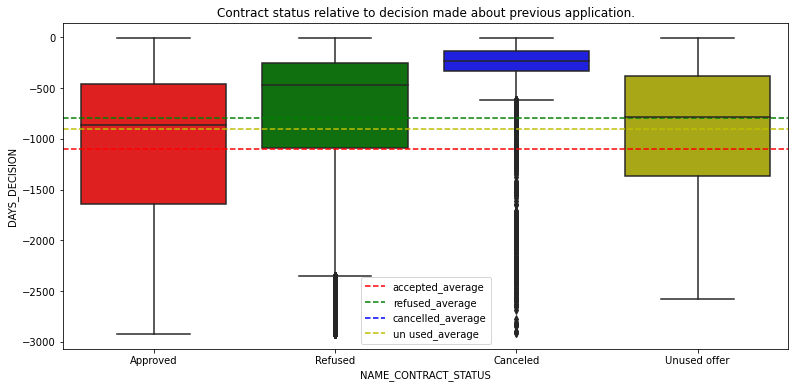

In [179]:
plt.figure(figsize=(13,6))
sns.boxplot(y= Previous_Application["DAYS_DECISION"],x = Previous_Application["NAME_CONTRACT_STATUS"],palette=["r","g","b","y"])

plt.axhline(Previous_Application[Previous_Application["NAME_CONTRACT_STATUS"] == "Approved"]["DAYS_DECISION"].mean(),
color="r",linestyle="dashed",label="accepted_average")

plt.axhline(Previous_Application[Previous_Application["NAME_CONTRACT_STATUS"] == "Refused"]["DAYS_DECISION"].mean(),
color="g",linestyle="dashed",label="refused_average")

plt.axhline(Previous_Application[Previous_Application["NAME_CONTRACT_STATUS"] == "Cancelled"]["DAYS_DECISION"].mean(),color="b",
linestyle="dashed",label="cancelled_average")

plt.axhline(Previous_Application[Previous_Application["NAME_CONTRACT_STATUS"] == "Unused offer"]["DAYS_DECISION"].mean(),color="y",
linestyle="dashed",label="un used_average")

plt.legend(loc="best")

plt.title("Contract status relative to decision made about previous application.")
plt.show()

#### Point to infer
On average approved contract types have higher number of decision days compared to cancelled and refused contracts.

### Client payment methods & reasons for application rejections
NAME_PAYMENT_TYPE - Payment method that client chose to pay for the previous application.

CODE_REJECT_REASON - Why was the previous application rejected.

In [180]:
plt.figure(figsize=(8,12))
plt.subplot(211)
rej = Previous_Application["CODE_REJECT_REASON"].value_counts().reset_index()
ax = sns.barplot("CODE_REJECT_REASON","index",data=rej[:6],palette="husl")
for i,j in enumerate(np.around((rej["CODE_REJECT_REASON"][:6].values*100/(rej["CODE_REJECT_REASON"][:6].sum())))):
    ax.text(.7,i,j,weight="bold")
plt.xlabel("Top as percentage & Bottom as Count")
plt.ylabel("CODE_REJECT_REASON")
plt.title("Reasons for application rejections")

plt.subplot(212)
pay = Previous_Application["NAME_PAYMENT_TYPE"].value_counts().reset_index()
ax1 = sns.barplot("NAME_PAYMENT_TYPE","index",data=pay,palette="husl")
for i,j in enumerate(np.around((pay["NAME_PAYMENT_TYPE"].values*100/(pay["NAME_PAYMENT_TYPE"].sum())))):
    ax1.text(.7,i,j,weight="bold")
plt.xlabel("pTop as percentage & Bottom as Count")
plt.ylabel("NAME_PAYMENT_TYPE")
plt.title("Clients payment methods")
plt.subplots_adjust(hspace = .3)

#### Point to infer
Around 81% of rejected applications the reason is XAP.

62% of chose to pay through cash by bank for previous applications.

### Distribution in Client suite type & client type.
NAME_TYPE_SUITE - Who accompanied client when applying for the previous application.

NAME_CLIENT_TYPE - Was the client old or new client when applying for the previous application.

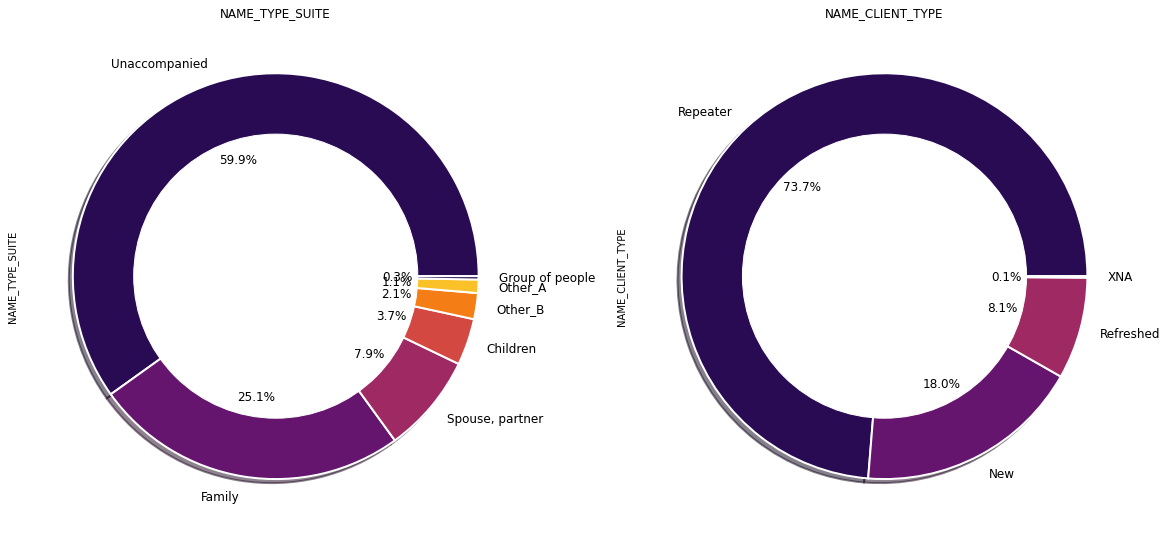

In [181]:
plt.figure(figsize=(20,20))
plt.subplot(121)
Previous_Application["NAME_TYPE_SUITE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
colors = sns.color_palette("inferno"),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_TYPE_SUITE")

plt.subplot(122)
Previous_Application["NAME_CLIENT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
colors = sns.color_palette("inferno"),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("NAME_CLIENT_TYPE")
plt.show()

#### Point to infer 
About 60% clients are un-accompained when applying for loans.

73% clients are old clients

### Popular goods for applying loans
NAME_GOODS_CATEGORY - What kind of goods did the client apply for in the previous application.

Text(0.5, 1.0, 'popular goods for applying loans')

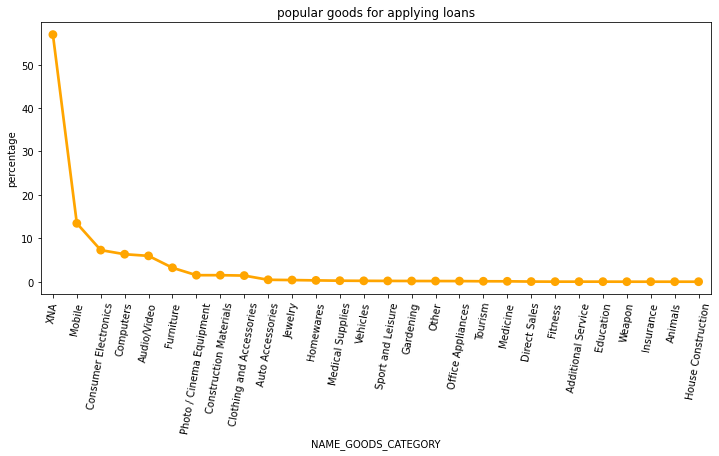

In [185]:
goods = Previous_Application["NAME_GOODS_CATEGORY"].value_counts().reset_index()
goods["percentage"] = round(goods["NAME_GOODS_CATEGORY"]*100/goods["NAME_GOODS_CATEGORY"].sum(),2)
fig = plt.figure(figsize=(12,5))
ax = sns.pointplot("index","percentage",data=goods,color="orange")
plt.xticks(rotation = 80)
plt.xlabel("NAME_GOODS_CATEGORY")
plt.ylabel("percentage")
plt.title("popular goods for applying loans")



#### Point to infer
XNA ,Mobiles ,Computers and consumer electronics are popular goods for applying loans

### Previous applications portfolio and product types
NAME_PORTFOLIO - Was the previous application for CASH, POS, CAR, …

NAME_PRODUCT_TYPE - Was the previous application x-sell o walk-in.

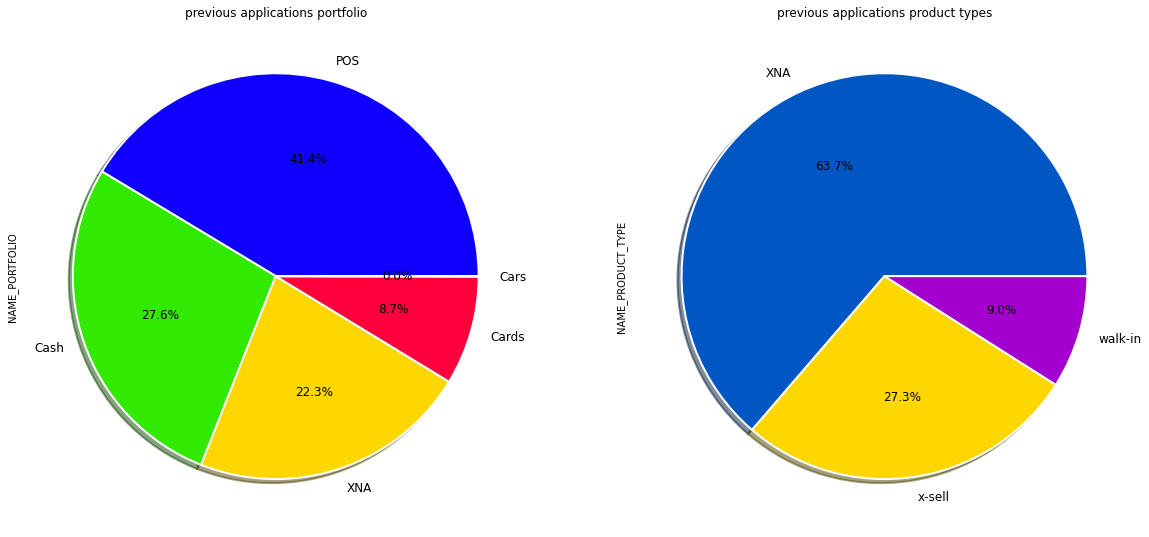

In [186]:
plt.figure(figsize=(20,20))
plt.subplot(121)
Previous_Application["NAME_PORTFOLIO"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
colors = sns.color_palette("prism",5),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("previous applications portfolio")

plt.subplot(122)
Previous_Application["NAME_PRODUCT_TYPE"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=12,
colors = sns.color_palette("prism",3),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
plt.title("previous applications product types")
plt.show()

### Approval,canceled and refusal rates by channel types.
CHANNEL_TYPE - Through which channel we acquired the client on the previous application.

NAME_CONTRACT_STATUS- Contract status (approved, cancelled, ...) of previous application.

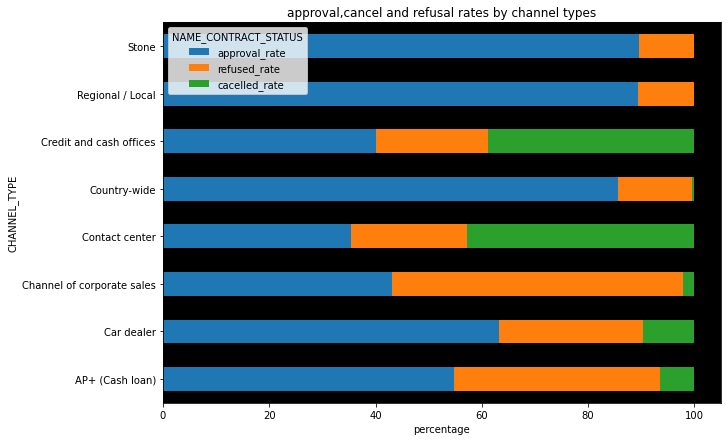

In [187]:
app = pd.crosstab(Previous_Application["CHANNEL_TYPE"],Previous_Application["NAME_CONTRACT_STATUS"])
app1 = app
app1["approval_rate"] = app1["Approved"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["refused_rate"]  = app1["Refused"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app1["cacelled_rate"] = app1["Canceled"]*100/(app1["Approved"]+app1["Refused"]+app1["Canceled"])
app2 = app[["approval_rate","refused_rate","cacelled_rate"]]
ax = app2.plot(kind="barh",stacked=True,figsize=(10,7))
ax.set_facecolor("k")
ax.set_xlabel("percentage")
ax.set_title("approval,cancel and refusal rates by channel types")
plt.show()

#### Point to infer from the graph
Channel types like Stone ,regional and country-wide have maximum approval rates.

Channel of coorporate sales have maximum refusal rate.

Credit-cash centres and Contact centres have maximum cancellation rates.

### Highest amount credited seller areas and industries.
SELLERPLACE_AREA - Selling area of seller place of the previous application.

NAME_SELLER_INDUSTRY - The industry of the seller.

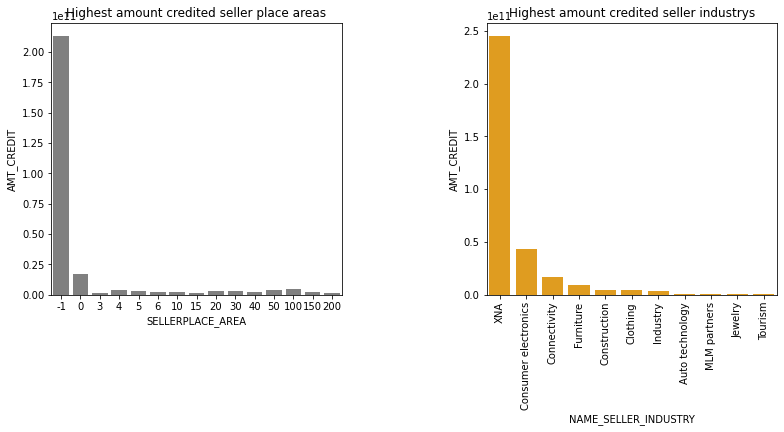

In [190]:
plt.figure(figsize=(13,5))
plt.subplot(121)
are = Previous_Application.groupby("SELLERPLACE_AREA")["AMT_CREDIT"].sum().reset_index()
are = are.sort_values(by ="AMT_CREDIT",ascending = False)
ax = sns.barplot(y= "AMT_CREDIT",x ="SELLERPLACE_AREA",data=are[:15],color="grey")

ax.set_title("Highest amount credited seller place areas")

plt.subplot(122)
sell = Previous_Application.groupby("NAME_SELLER_INDUSTRY")["AMT_CREDIT"].sum().reset_index().sort_values(by = "AMT_CREDIT",ascending = False)
ax1=sns.barplot(y = "AMT_CREDIT",x = "NAME_SELLER_INDUSTRY",data=sell,color="orange")

ax1.set_title("Highest amount credited seller industrys")
plt.xticks(rotation=90)
plt.subplots_adjust(wspace = .5)
fig.set_facecolor("lightgrey")

### Popular terms of previous credit at application.
CNT_PAYMENT - Term of previous credit at application of the previous application.

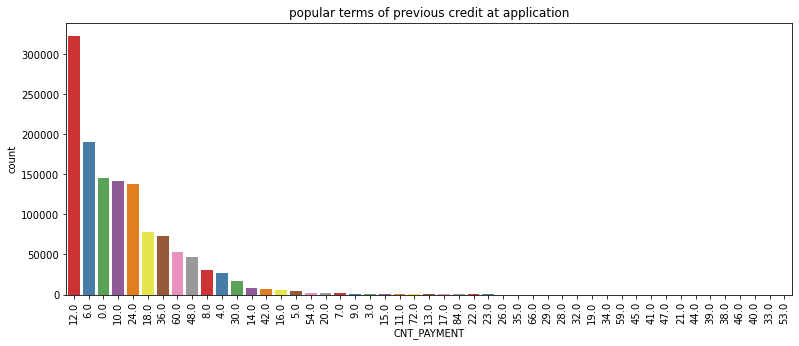

In [192]:
plt.figure(figsize=(13,5))
ax = sns.countplot(Previous_Application["CNT_PAYMENT"],palette="Set1",order=Previous_Application["CNT_PAYMENT"].value_counts().index)

plt.xticks(rotation = 90)
plt.title("popular terms of previous credit at application")
plt.show()

#### Point to infer 
Popular term of previous credit are 6months ,10months ,1year ,2years & 3 years.

### Detailed product combination of the previous application

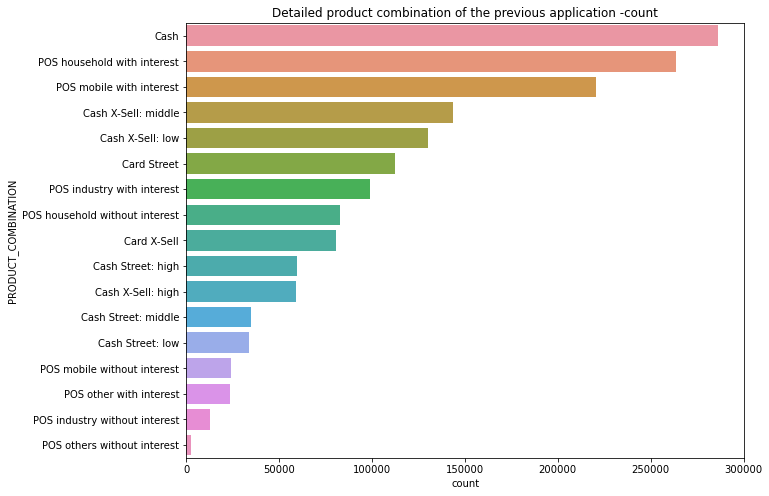

In [193]:
plt.figure(figsize=(10,8))
sns.countplot(y = Previous_Application["PRODUCT_COMBINATION"],order=Previous_Application["PRODUCT_COMBINATION"].value_counts().index)
plt.title("Detailed product combination of the previous application -count")
plt.show()

### Frequency distribution of intrest rates and client insurance requests
NAME_YIELD_GROUP - Grouped interest rate into small medium and high of the previous application.

NFLAG_INSURED_ON_APPROVAL - Did the client requested insurance during the previous application.

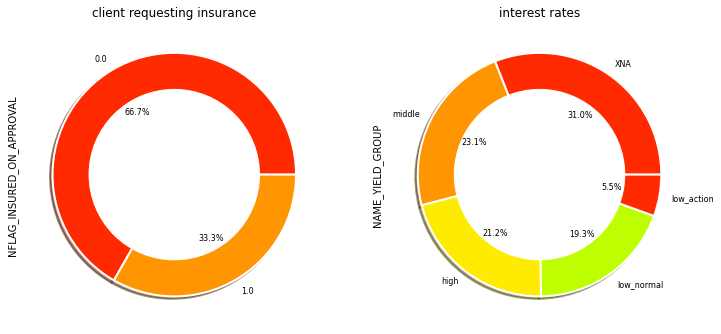

In [194]:
plt.figure(figsize=(12,6))
plt.subplot(121)
Previous_Application["NFLAG_INSURED_ON_APPROVAL"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
colors = sns.color_palette("prism",4),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("client requesting insurance")

plt.subplot(122)
Previous_Application["NAME_YIELD_GROUP"].value_counts().plot.pie(autopct = "%1.1f%%",fontsize=8,
colors = sns.color_palette("prism",4),wedgeprops={"linewidth":2,"edgecolor":"white"},shadow =True)
circ = plt.Circle((0,0),.7,color="white")
plt.gca().add_artist(circ)
plt.title("interest rates")
plt.show()

### Days variables - Relative to application date of current application
DAYS_FIRST_DRAWING - Relative to application date of current application when was the first disbursement of the previous application.

DAYS_FIRST_DUE - Relative to application date of current application when was the first due supposed to be of the previous application.

DAYS_LAST_DUE_1ST_VERSION - Relative to application date of current application when was the first due of the previous application.

DAYS_LAST_DUE -Relative to application date of current application when was the last due date of the previous application.

DAYS_TERMINATION - Relative to application date of current application when was the expected termination of the previous application.

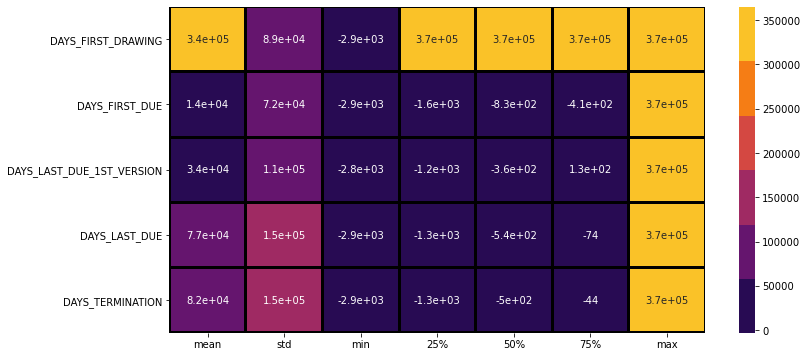

In [195]:
cols = ['DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE', 'DAYS_TERMINATION']
plt.figure(figsize=(12,6))
sns.heatmap(Previous_Application[cols].describe()[1:].transpose(),
annot=True,linewidth=2,linecolor="k",cmap=sns.color_palette("inferno"))
plt.show()

# Corelation between variables

### Application Data

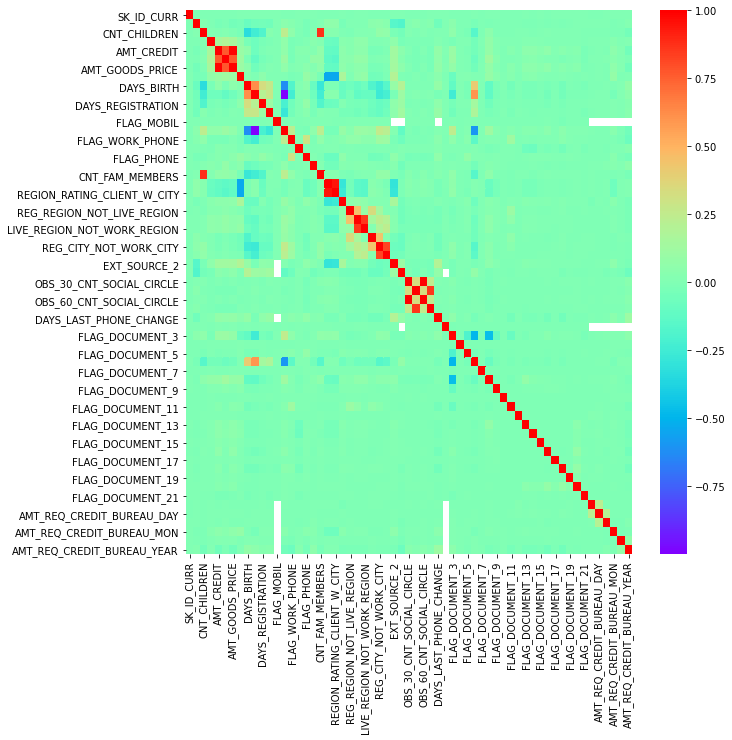

In [198]:
corrmat = Application.corr() 
  
f, ax = plt.subplots(figsize =(10, 10)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

### Previous Application

In [200]:
corrmat = Previous_Application.corr() 
  
f, ax = plt.subplots(figsize =(10, 10)) 
sns.heatmap(corrmat, ax = ax, cmap ="rainbow") 
plt.show()

In [201]:
corrmat = Previous_Application.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                Var2  Correlation
88             AMT_GOODS_PRICE     AMT_APPLICATION         1.00
89             AMT_GOODS_PRICE          AMT_CREDIT         0.99
71                  AMT_CREDIT     AMT_APPLICATION         0.98
269           DAYS_TERMINATION       DAYS_LAST_DUE         0.93
87             AMT_GOODS_PRICE         AMT_ANNUITY         0.82
70                  AMT_CREDIT         AMT_ANNUITY         0.82
53             AMT_APPLICATION         AMT_ANNUITY         0.81
232  DAYS_LAST_DUE_1ST_VERSION  DAYS_FIRST_DRAWING         0.80
173                CNT_PAYMENT     AMT_APPLICATION         0.68
174                CNT_PAYMENT          AMT_CREDIT         0.67

## Application Data

#### Top 10 Correlation Fields for Repayer

In [203]:
df_repayer = Application[Application['TARGET'] == 0]
df_defaulter = Application[Application['TARGET'] == 1]
corrmat = df_repayer.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                        Var2  Correlation
802                FLAG_EMP_PHONE               DAYS_EMPLOYED         1.00
1982     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
370               AMT_GOODS_PRICE                  AMT_CREDIT         0.99
1239  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.95
1100              CNT_FAM_MEMBERS                CNT_CHILDREN         0.88
2044     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.86
1487  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.86
1673      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.83
371               AMT_GOODS_PRICE                 AMT_ANNUITY         0.78
309                   AMT_ANNUITY                  AMT_CREDIT         0.77

## Top 10 Correlation Fields for Defaulter

In [204]:
corrmat = df_defaulter.corr() 
corrdf = corrmat.where(np.triu(np.ones(corrmat.shape), k=1).astype(np.bool))
corrdf = corrdf.unstack().reset_index()
corrdf.columns = ['Var1', 'Var2', 'Correlation']
corrdf.dropna(subset = ['Correlation'], inplace = True)
corrdf['Correlation'] = round(corrdf['Correlation'], 2)
corrdf['Correlation'] = abs(corrdf['Correlation'])
corrdf.sort_values(by = 'Correlation', ascending = False).head(10)

Var1                        Var2  Correlation
1982     OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE         1.00
802                FLAG_EMP_PHONE               DAYS_EMPLOYED         1.00
370               AMT_GOODS_PRICE                  AMT_CREDIT         0.98
1239  REGION_RATING_CLIENT_W_CITY        REGION_RATING_CLIENT         0.96
1100              CNT_FAM_MEMBERS                CNT_CHILDREN         0.89
2044     DEF_60_CNT_SOCIAL_CIRCLE    DEF_30_CNT_SOCIAL_CIRCLE         0.87
1487  LIVE_REGION_NOT_WORK_REGION  REG_REGION_NOT_WORK_REGION         0.85
1673      LIVE_CITY_NOT_WORK_CITY      REG_CITY_NOT_WORK_CITY         0.78
371               AMT_GOODS_PRICE                 AMT_ANNUITY         0.75
309                   AMT_ANNUITY                  AMT_CREDIT         0.75

In [206]:
mergeddf =  pd.merge(Application,Previous_Application,on='SK_ID_CURR')
mergeddf.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR  \
0      100002       1           Cash loans           M            N   
1      100003       0           Cash loans           F            N   
2      100003       0           Cash loans           F            N   
3      100003       0           Cash loans           F            N   
4      100004       0      Revolving loans           M            Y   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  \
0               Y             0          202500.0      406597.5   
1               N             0          270000.0     1293502.5   
2               N             0          270000.0     1293502.5   
3               N             0          270000.0     1293502.5   
4               Y             0           67500.0      135000.0   

   AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE_x NAME_INCOME_TYPE  \
0        24700.5           351000.0     Unaccompanied          Working   
1        35698.5          1129500.0            Family    State servant   
2        35698.5          1129500.0            Family    State servant   
3        35698.5          1129500.0            Family    State servant   
4         6750.0           135000.0     Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3               Higher education               Married  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801        9461            637             3648.0   
1                    0.003541       16765           1188             1186.0   
2                    0.003541       16765           1188             1186.0   
3                    0.003541       16765           1188             1186.0   
4                    0.010032       19046            225             4260.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             2120           1               1                0   
1              291           1               1                0   
2              291           1               1                0   
3              291           1               1                0   
4             2531           1               1                1   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0      Core staff              2.0   
3                 1           1           0      Core staff              2.0   
4                 1           1           0        Laborers              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     1                            1   
3                     1                            1   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  \
0                    WEDNESDAY                         10   
1                       MONDAY                         11   
2                       MONDAY                         11   
3                       MONDAY                         11   
4                       MONDAY                          9   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                  

In [207]:
y = mergeddf.groupby('SK_ID_CURR').size()
dfA = mergeddf.groupby('SK_ID_CURR').agg({'TARGET': np.sum})
dfA['count'] = y
display(dfA.head(10))

TARGET  count
SK_ID_CURR               
100002           1      1
100003           0      3
100004           0      1
100006           0      9
100007           0      6
100008           0      5
100009           0      7
100010           0      1
100011           0      4
100012           0      4

In [208]:
dfA.sort_values(by = 'count',ascending=False).head(10)

TARGET  count
SK_ID_CURR               
265681           0     73
173680           0     72
242412           0     68
206783           0     67
389950           0     64
382179           0     64
198355           0     63
345161           0     62
446486           0     62
238250           0     61

In [209]:
df_repayer = dfA[dfA['TARGET'] == 0]
df_defaulter = dfA[dfA['TARGET'] == 1]

### Repayers' Borrowing History

In [210]:
df_repayer.sort_values(by = 'count',ascending=False).head(10)

TARGET  count
SK_ID_CURR               
265681           0     73
173680           0     72
242412           0     68
206783           0     67
382179           0     64
389950           0     64
198355           0     63
446486           0     62
345161           0     62
280586           0     61

### Defaulters' Borrowing History

In [211]:
df_defaulter.sort_values(by = 'count',ascending=False).head(10)

TARGET  count
SK_ID_CURR               
100002           1      1
333349           1      1
333587           1      1
333582           1      1
333534           1      1
333506           1      1
333419           1      1
333355           1      1
333337           1      1
334761           1      1